# Weathering mediation of rock erosion

### with particular application to bedrock channels

## Summary

Weathering weakens bedrock and makes it more susceptible to mechanical erosion. Such weakening is an important process not only on hillslopes, but also in bedrock channels. The motivation of this study is to understand how weathering-driven weakening mediates the rate of bedrock erosion along channel boundaries free of cover, such as along channel walls. 
Rock weakness is defined here as its propensity to erosion by flow-driven particle impacts: experimental data indicate that such weakness is inversely proportional to the square of tensile strength, and that weakening takes place through wet/dry, freeze-thaw and thermal cycling at rates that diminish in a roughly exponential fashion with depth below the surface.
By solving a simple 1d model of this form of weathering, weakening and coeval erosion of bedrock, a surprising result emerges. Two speeds control model behavior: (i)~the speed of ingress of the weathering front $w_0/k$, which arises from a baseline weathering rate $w_0$ and an e-folding depth $1/k$, and (ii)~the baseline speed of erosion of fresh rock $v_0$. 
Behavior is parameterized by the ratio of the two speeds, defined here as the dimensionless weathering number $W$.
For slow weathering relative to the baseline erosion rate, $W<0.25$, the two speeds simply add and the rate of erosion is ${v_0 + w_0/k}$.
However, for relatively fast weathering, $W>2.5$, the predicted behavior is counter-intuitive: the rate of erosion becomes half the baseline speed $v_0/2$ augmented by the geometric mean of the two speeds $\sqrt{v_0 w_0/k}$; for very fast weathering, the multiplicative average dominates. 
Under no circumstances does the rate of weathering alone limit the rate of erosion. In a test of the model, its application to erosion of bedrock channel cross-sections generates solutions of time-invariant shape (permanent form) consistent with field observations.

### Preliminaries

In [1]:
import wme, sympy as sy, numpy as np
# from matplotlib.pylab import plt
sy.init_printing(pretty_print=True,wrap_line=True)
from sympy import Eq
from wme.symbols import *

## Data

In [2]:
ed = wme.data.ExptData()

In [3]:
ed.read_excel('inoue',
              dir_name=('..','data'), file_name='Inoue_wetdryN_sigmaT')
df = ed.ddict['inoue']
df['w_sigma2'] = (df.sigmaT*2.21)**(-2)
df['w_sigma1p5'] = (df.sigmaT*2.21)**(-1.5)
ed.ddict['inoue']

,wetdryN,sigmaT,w_sigma2,w_sigma1p5
0,0.0,0.450779,1.007601,1.005695
1,0.0,0.390966,1.339486,1.245098
2,0.0,0.240810,3.530746,2.575727
3,0.0,0.231464,3.821623,2.733291
4,0.0,0.210903,4.603076,3.142579
5,0.0,0.200312,5.102742,3.395101
6,1.0,0.190966,5.614416,3.647358
7,1.0,0.161059,7.893042,4.709050
8,1.0,0.131153,11.903134,6.408347
9,1.0,0.120561,14.086516,7.271143


In [4]:
ed.fit_linear_model('inoue','wetdryN','w_sigma2')

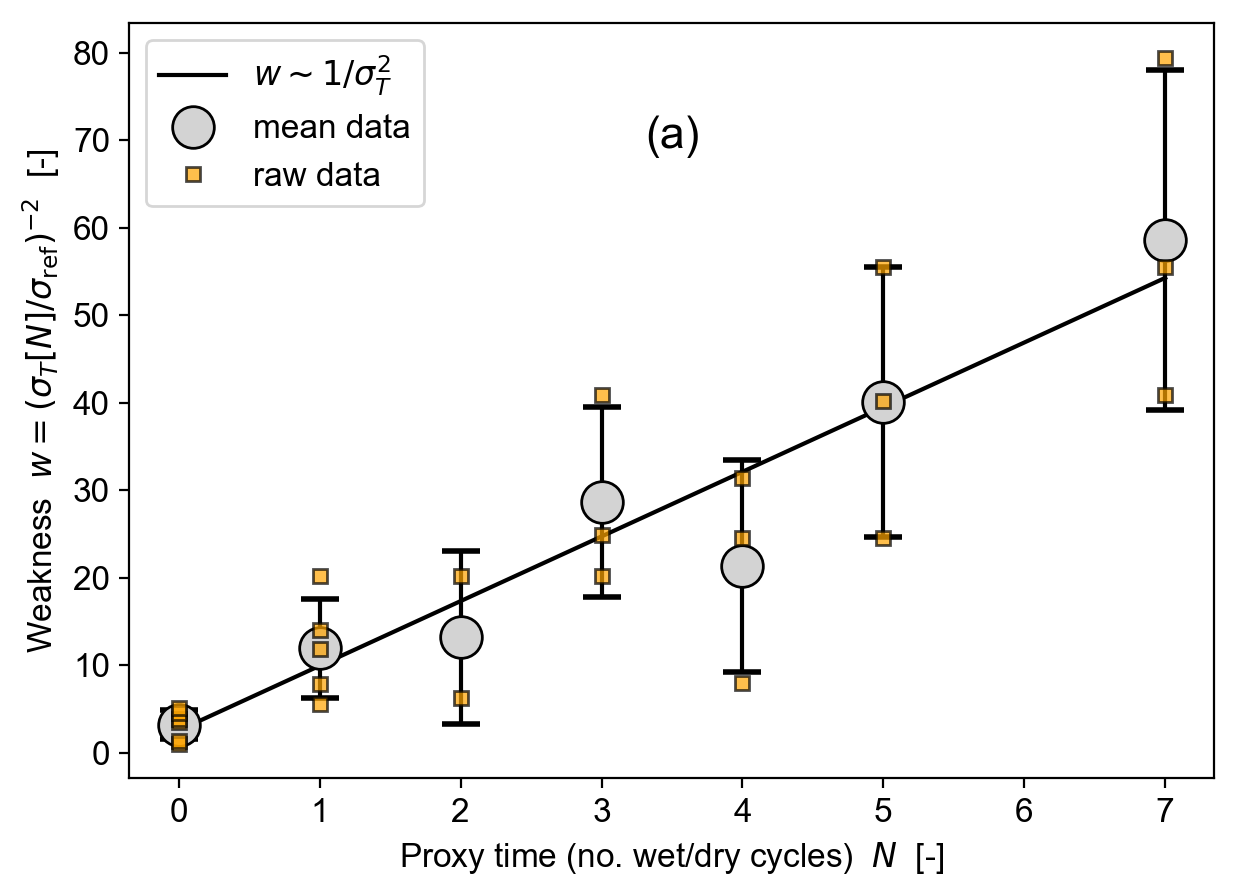

In [5]:
inoue_fig_w_wetdry = wme.plot.create_figure('inoue_w_wetdry')
wme.plot.plot_inoue_w_wetdryN(inoue_fig_w_wetdry,ed,  
                               text_label=((0.5,0.85),'(a)',16))

In [6]:
ed.read_excel('li',dir_name=('..','data'), file_name='Li_wetdryN_table1')
df = ed.ddict['li']
sigma_sf = 180
# df['sigmaC_ref'] = np.tile((df.sigmaC[0:3]),6)
df['w_sigma2']   = (df.sigmaC/180)**(-2)
df['w_sigma1p5'] = (df.sigmaC/180)**(-1.5)
ed.ddict['li']

,wetdryN,P,sigmaC,Y,C,phi,w_sigma2,w_sigma1p5
0,0,2,110.02,26.71,13.86,56.29,2.676713,2.092673
1,0,6,174.54,24.78,13.86,56.29,1.063543,1.047288
2,0,10,185.97,30.97,13.86,56.29,0.936827,0.952236
3,1,2,96.81,18.38,12.75,54.66,3.457041,2.535295
4,1,6,147.38,8.99,12.75,54.66,1.491653,1.349743
5,1,10,173.21,28.06,12.75,54.66,1.079939,1.059374
6,5,2,95.50,23.79,13.44,52.57,3.552534,2.587639
7,5,6,133.66,24.94,13.44,52.57,1.813602,1.562811
8,5,10,165.11,28.95,13.44,52.57,1.188497,1.138279
9,15,2,71.39,9.11,7.89,56.24,6.357264,4.003618


In [7]:
ed.fit_linear_model('li','wetdryN','w_sigma2',select='P')

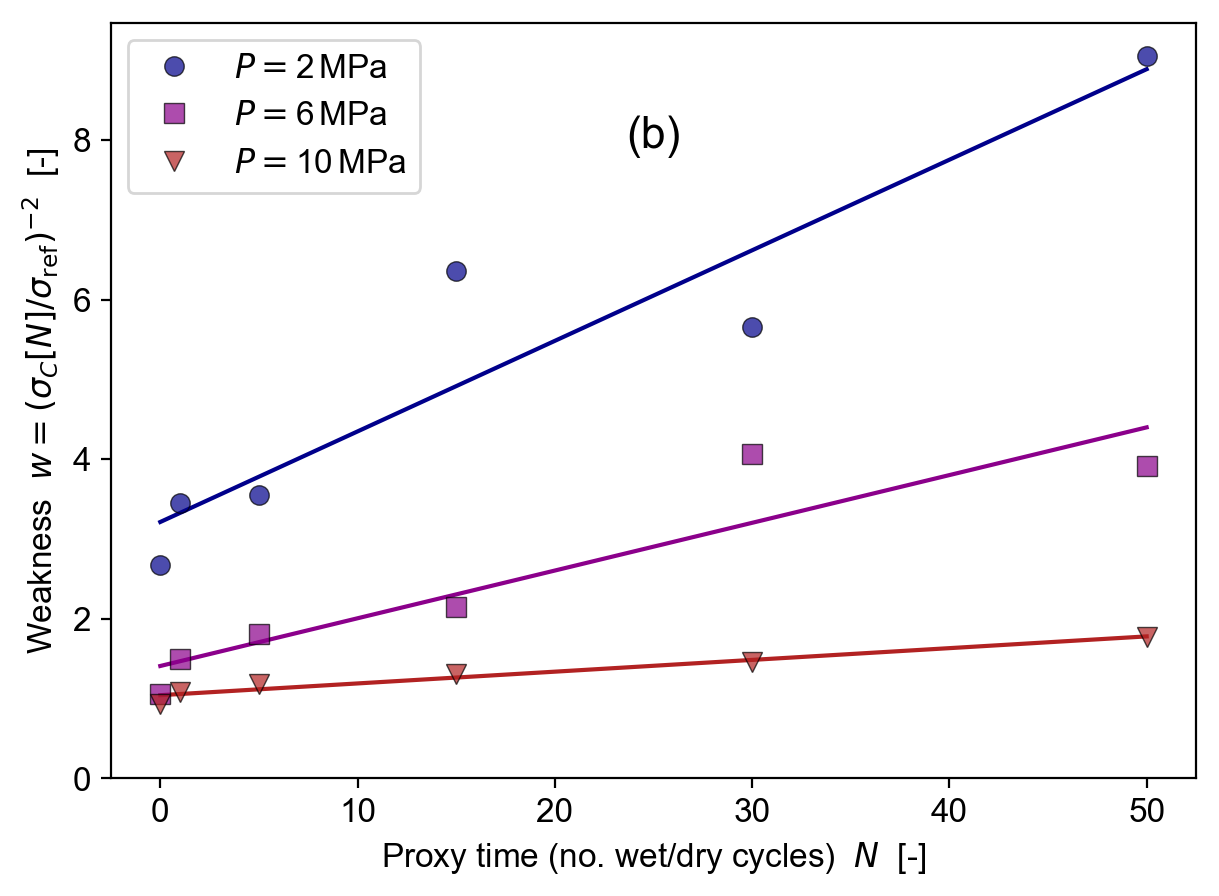

In [8]:
li_fig_w_wetdryN = wme.plot.create_figure('li_w_wetdryN')
wme.plot.plot_li_w_wetdryN(li_fig_w_wetdryN, ed, 
                           text_label=((0.5,0.85),'(b)',16))

In [9]:
ed.fit_weathering_model('li','w_sigma2')

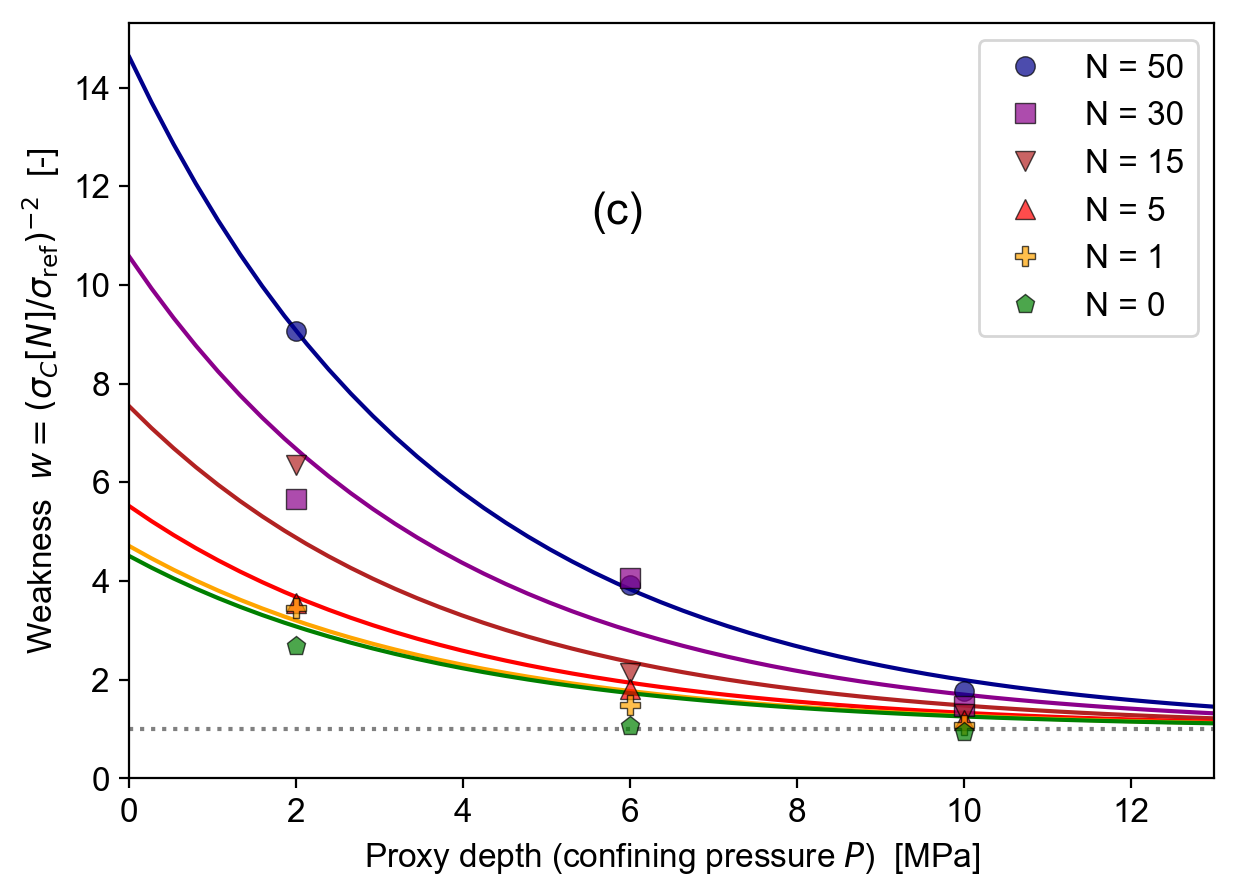

In [10]:
li_fig_w_P = wme.plot.create_figure('li_w_P')
wme.plot.plot_li_w_P(li_fig_w_P,ed, text_label=((0.45,0.75),'(c)',16))

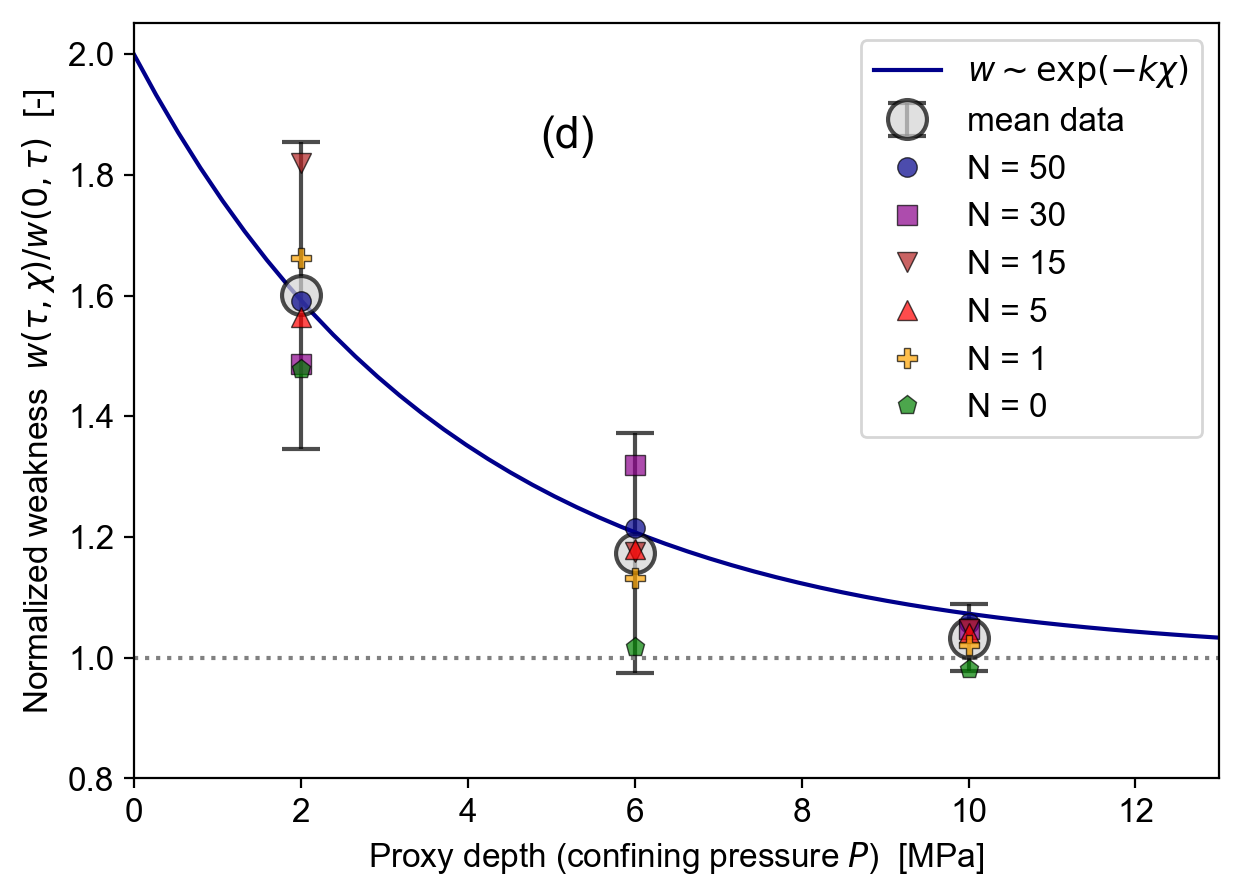

In [11]:
li_fig_w_normed_P = wme.plot.create_figure('li_w_normed_P')
wme.plot.plot_li_w_surface_normed_P(li_fig_w_normed_P,ed, 
                             text_label=((0.4,0.85),'(d)',16))

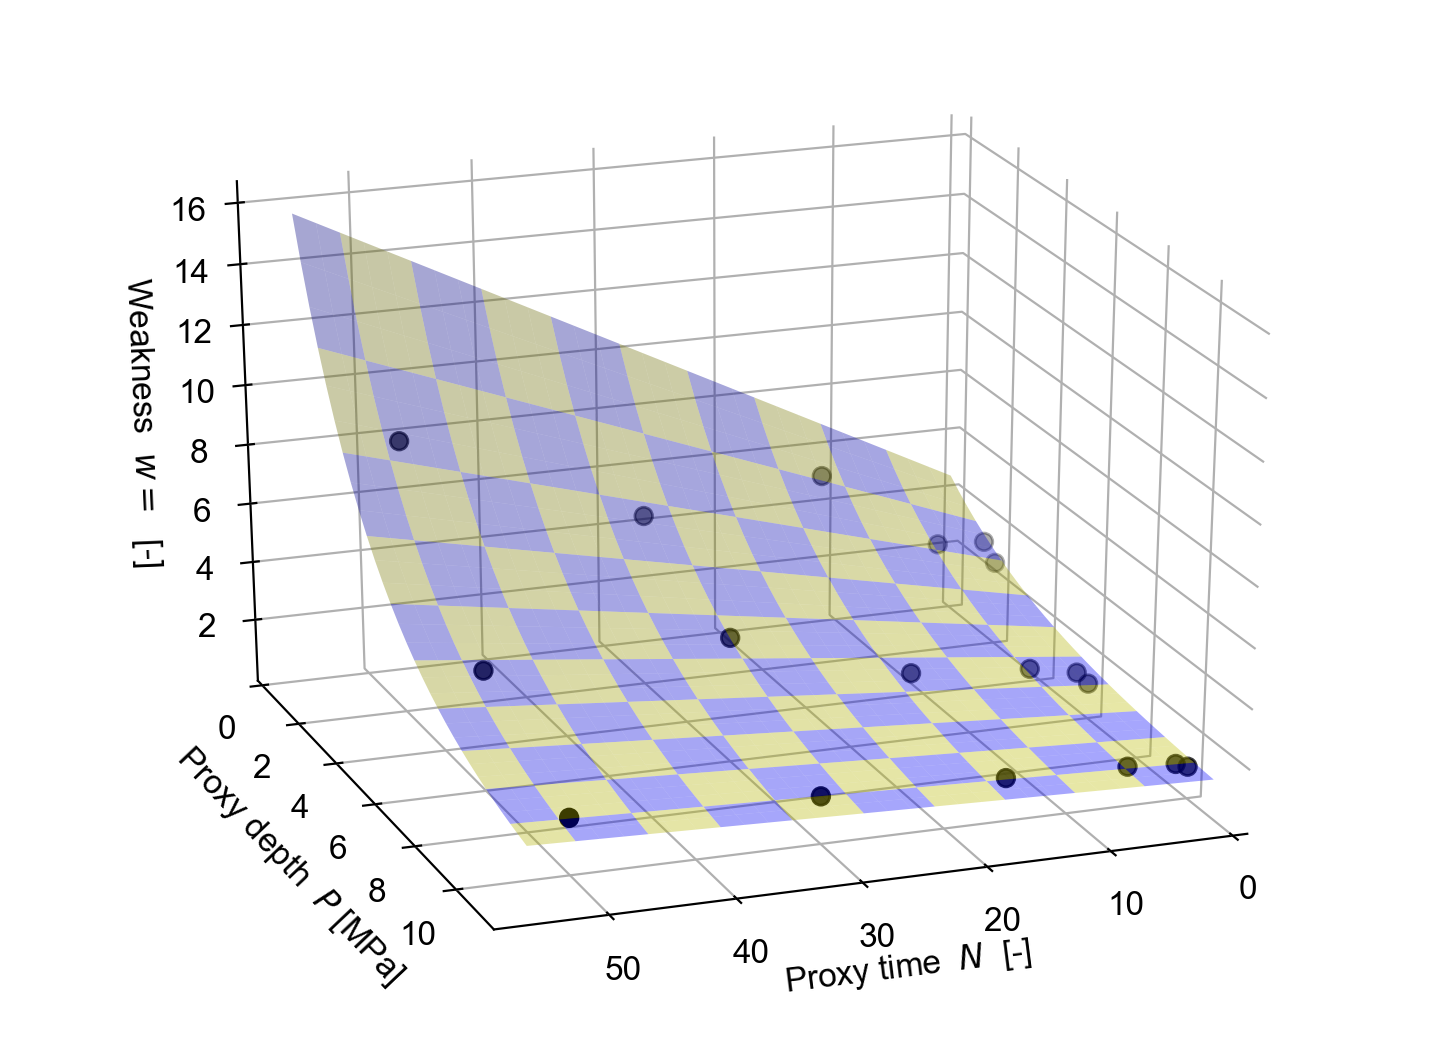

In [12]:
li_fig_w_wetdryN_P = wme.plot.create_figure('li_w_wetdryN_P')
wme.plot.plot_li_w_wetdryN_P(li_fig_w_wetdryN_P, ed,
                                  'li_w_sigma2_surface')

## Theory

In [13]:
em = wme.theory.WeatheringMediatedErosion()

**_The notes below are a bit stale, so take with a pinch of salt_**

### Preface



Jakob 2013 (in Encyclopedia of Geomorphology, ed. Andrew Goudie): 

  - _a weathering-limited system is one in which the supply of material determines the flux of mass_

### Symbols

Model parameters:

\begin{eqnarray}
     &x&  = \text{distance}  \quad&\text{[m]}\quad \qquad&\dots\quad x\geq 0 \\
     &t&  = \text{time}   \quad&\text{[y]}\quad \qquad&\dots\quad  t\geq 0 \\
     &f&  = \text{front position}   \quad&\text{[m]}\quad \qquad&\dots\quad  f(t)\geq0 \\
     &\eta&  = \text{weakness}   \quad&\text{[-]}\quad \qquad&\dots\quad  \eta(x-f,t)\geq 1 \\
     &w_0&  = \text{weakening rate} \quad&\text{[y}^{-1}\text{]}\quad \qquad&\dots\quad  w_0>0 \\
     &k&  = \text{weakening e-fold depth} \quad&\text{[m}^{-1}\text{]}\quad \qquad&\dots\quad  k>0 \\
     &v_0&  = \text{erosion rate @ ref weakness}\,\,\eta=1 \quad&\text{[m}\,\text{y}^{-1}\text{]}\quad \qquad&\dots\quad  v_0>0 \\
     &f_s&  = \text{front position @ steady state}   \quad&\text{[m]}\quad \qquad&\dots\quad  f_s(t)\geq 0 \\
     &\eta_s&  = \text{weakness @ steady state}  \quad&\text{[-]}\quad \qquad&\dots\quad  \eta_s(f)\geq 1 \\
     &v_s&  = \text{erosion rate @ steady state} \quad&\text{[m}\,\text{y}^{-1}\text{]}\quad \qquad&\dots\quad  v_s>0
\end{eqnarray}

Non-dimensionalized parameters:

\begin{eqnarray}
     &W&  = \text{weathering number}  \qquad&\dots\quad W\geq 0 \\
     &\chi&  = \text{distance}  \qquad&\dots\quad \chi\geq 0 \\
     &\tau&  = \text{time}   \qquad&\dots\quad  \tau\geq 0 \\
     &\varphi&  = \text{front position}   \qquad&\dots\quad  \varphi(\tau)\geq 0 \\
     &\varphi_s&  = \text{front position @ steady state}   \qquad&\dots\quad  \varphi_s(\tau)\geq 0 \\
     &\nu_s&  = \text{erosion rate @ steady state} \qquad&\dots\quad  \nu_s>0
\end{eqnarray}

### Model definition

The model describes in 1d the weathering-driven weakening and erosion of otherwise uniform bedrock. 

The position of the rock surface is defined as $f(t)$ over time $t$ and defines a moving boundary in the $+x$ direction. The non-dimensional symbols for these variables are  $\varphi$, $\tau$ and $\chi$ respectively. 

Rock weakness is given by $\eta(x,t)$ and is assumed to have a reference background value of $\eta(x,0)=1$. Weakening is assumed to be driven by a weathering profile with exponential decay form and an e-folding depth of $1/k$.
The weakening rate is assumed to follow the weathering profile and be scaled by a dimensionless rate $w_0$.

The speed of erosion is considered proportional to bedrock weakness $\eta$ and is scaled by the erosion rate $v_0$ for unweakened rock.

Combining these model elements, the governing equations are:

\begin{equation}
    \dfrac{\partial\eta}{\partial{t}} + \dfrac{\partial{f}}{\partial{t}} 
                                      \dfrac{\partial\eta}{\partial{x}}
    = w_0\, e^{-k(x-f)}
\end{equation}

\begin{equation}
    \dfrac{\partial{f}}{\partial{t}} = v_0\,\eta(f(t),t)
\end{equation}

The solution to this system of PDEs has an initial phase of evolution as the weakness profile develops (as erosion proceeds) towards an equilibrium exponential profile $\eta_s(x-f)$, followed by a steady-state motion of the erosion front at speed $v_s$ (non-dimensionalized to $\nu_s$) that drives a translation of the unchanging equilibrium weakness profile.

Model behavior is nicely parameterized by a dimensionless number $W$, which expresses the ratio of the reference speeds of motion of the weathering front (for zero erosion) $w_0/k$ and the erosion front (for unit weakness) $v_0$. 

The analysis below reveals that: 
   - for large weathering number $W\gg 1/4$, the processes of weakening and erosion combine _multiplicatively_ to give a steady-state speed of erosion that is the _geometric mean_ of the two reference rates $v_s \approx \sqrt{v_0 w_0/k}$
   - for small weathering number $W\ll 1/4$, the processes of weakening and erosion combine _additively_ to give a steady-state speed of erosion that is the _sum_ of the two reference rates $v_s \approx v_0+w_0/k$

The rest of this section deals with solving for the steady-state weakness profile and the corresponding erosion rate. The subsequent sections compute a finite-difference numerical solution for the complete problem that describes the transient behavior and evolution towards steady-state.  

Solving the moving boundary PDE is not entirely straightforward, because  the position of the erosion front $f(t)$ is a _functional_ that integrates over the time-varying weakness $\eta(f(t),t)$. It may be possible to obtain a full analytical solution using the method of characteristics, or another scheme, but for the purposes of this study a numerical solution was deemed sufficient for the transient case.

### Steady state

Once at steady-state, the front $f(t)$ moves at constant speed $v_s$. By fixing an arbitrary time origin $t=0$ at which steady-state has been achieved, the front position $f_s(t)$ translates linearly with time:

\begin{equation}
    f_s(t) = v_s t
\end{equation}

\begin{equation}
    v_s = \dfrac{\partial{f_s}}{\partial{t}} = v_0\,\eta(f_s(t),t)
\end{equation}

The weathering profile $\eta(x,t)$ reaches a stable form $\eta_s(x-f_s)$ and thus at the front $x=f_s$ the weakness is

\begin{equation}
    \eta(f_s,t) = \eta_s(0)
\end{equation}

and the steady-state speed of motion of the erosion front is

\begin{equation}
    v_s = v_0\,\eta_s(0)
\end{equation}

### Non-dimensionalization

Non-dimensionalizing:

\begin{equation}
\begin{array}{c}
    \tau = w_0 t \\
    \chi = k x \\
    \varphi = k f \,,\,\, \varphi_s = k f_s \\
    \nu_s = \dfrac{v_s}{v_0}
\end{array}
\end{equation}

suggests the following dimensionless "weathering number":

\begin{equation}
    W \equiv \dfrac{w_0}{k v_0}
\end{equation}

which is effectively the ratio of the speed of motion of the weathering front to the speed of erosion of unweathered rock.

\begin{equation}
    W \dfrac{\partial\varphi}{\partial\tau} = \eta(\varphi)
\end{equation}

\begin{equation}
    \dfrac{\partial\eta}{\partial\tau} + \dfrac{\partial\varphi}{\partial\tau} 
                                         \dfrac{\partial\eta}{\partial\chi}
    = e^{-(\chi-\varphi)}
\end{equation}



### Reduction to an ODE

Forcing erosion front motion to its steady-state speed leads to its dimensionless position $\varphi_s$ to be:

\begin{equation}
    \varphi_s = \frac{\nu_s}{W} \tau
\end{equation}

Substituting, we have the pde:

\begin{equation}
    \dfrac{\partial\eta}{\partial\tau} + \dfrac{\nu_s}{W}\dfrac{\partial\eta}{\partial\chi}
    = \exp\left[-\left(\chi-\dfrac{\nu_s}{W}\tau\right)\right]
\end{equation}

\begin{equation}
    \eta(\chi,0) = \eta_s(\chi)
\end{equation}

Since the steady solution $\eta_s(\chi)$ is time-invariant, we can reduce the PDE in $(\chi,\tau)$ into an ODE in $\chi-\nu_s\tau/W$. 

First the variable change:

\begin{equation}
    \chi_s = \chi - \dfrac{\nu_s}{W}\tau
\end{equation}

\begin{equation}
    \dfrac{\mathrm{d}\eta}{\mathrm{d}\chi_s} 
    = \dfrac{\partial\eta}{\partial\tau}\dfrac{\mathrm{d}\tau}{\mathrm{d}\chi_s} +
     \dfrac{\partial\eta}{\partial\chi}\dfrac{\mathrm{d}\chi}{\mathrm{d}\chi_s}
    = -\dfrac{W}{\nu_s}\dfrac{\partial\eta}{\partial\tau} +
        \dfrac{\partial\eta}{\partial\chi}
\end{equation}

and then by imposing the steady solution $\eta(x-\chi_s,\tau)=\eta_s(\chi_s)$, we get:

\begin{equation}
    \dfrac{\mathrm{d}\eta_s}{\mathrm{d}\chi_s} 
    =  \dfrac{\partial\eta}{\partial\chi}
\end{equation}

and thus:

\begin{equation}
    \dfrac{\mathrm{d}\eta_s}{\mathrm{d}\chi_s} 
    =  -\dfrac{W}{\nu_s} \exp\left(-\chi_s\right)
\end{equation}

### Solution of ODE

Since 

\begin{equation}
    \lim_{\chi_s\rightarrow\infty}\eta_s(\chi_s)=1
\end{equation}

we obtain

\begin{equation}
    \eta_s(\chi_s)
    =  1+\dfrac{W}{\nu_s} \exp\left(-\chi_s\right)
\end{equation}

and so

\begin{equation}
    \eta_s\left(\chi-\chi_s,\tau\right)
    =  1+\dfrac{W}{\nu_s} \exp\left[-\left(\chi-\dfrac{\nu_s}{W}\tau\right)\right]
\end{equation}

### Speed of steady-state erosion front

Now for the interesting bit: the (dimensionless) steady-state speed of the erosion front is a function only of the weakness at the front, and so:

\begin{equation}
    \nu_s = \eta_s(0) = 1 + \dfrac{W}{\nu_s}
\end{equation}

which rearranges to give

\begin{equation}
    \nu_s^2 - \nu_s - W =0
\end{equation}

and which solves to give

\begin{equation}
    \nu_s = \dfrac{1}{2}\left( 1+\sqrt{1+4W}  \right)
\end{equation}

which in dimensioned form is

\begin{equation}
    v_s =  \dfrac{v_0}{2}\left( 1+\sqrt{1+\dfrac{4w_0}{k v_0}}  \right)
\end{equation}

### Limiting behavior

For so-called weathering (supply) limitation, $W \ll 1/4$:

\begin{equation}
    \lim_{W\rightarrow\infty} \nu_s \approx 1+W
    \quad\Leftrightarrow\quad
    v_s \approx  v_0 + \frac{w_0}{k}
\end{equation}

For so-called erosion limitation (unlimited supply), $W \gg 2.5$:

\begin{equation}
    \lim_{W\rightarrow\infty} \nu_s \approx \dfrac{1}{2}+ \sqrt{W}
    \quad\Leftrightarrow\quad
    v_s \approx \dfrac{1}{2}+\sqrt{\frac{w_0 v_0}{k}}
\end{equation}



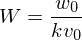

In [14]:
em.W_eqn

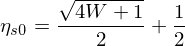

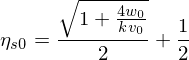

In [15]:
em.etas0_eqn_W
em.etas0_eqn_w0_v0

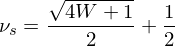

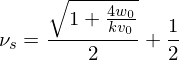

In [16]:
em.nus_eqn_etas0
em.nus_eqn_W
em.nus_eqn_w0_v0

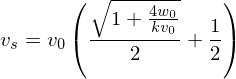

In [17]:
em.vs_eqn_etas0_v0
em.vs_eqn_w0_v0

In [18]:
# fig_v0_nus_etas0 = wme.plot.create_figure('v0_nus_etas0')
# wme.plot.plot_v0_nus_etas0(fig_v0_nus_etas0, em)

In [19]:
# em.v0_eqn_vs_w0

In [20]:
# em.v0_eqn_vs_w0
# fig_v0_vs_w0 = wme.plot.create_figure('v0_vs_w0')
# wme.plot.plot_v0_vs_w0(fig_v0_vs_w0, em, k__=1)

## Solutions

### High $W$

In [21]:
pdict = {
    w_0: np.float64(100),
    v_0: np.float64(10),
    k:   np.float64(1)
}
ndict = {
    chi_domain_size: 20.0,
    tau_domain_size: 80.0,
    Delta_chi      : 0.005,
    Delta_tau      : 0.005
}
ew_highW = wme.solve1d.ErosionWeathering(pdict,ndict)
ew_highW.ndict
ew_highW.solve()
ew_highW.pdict

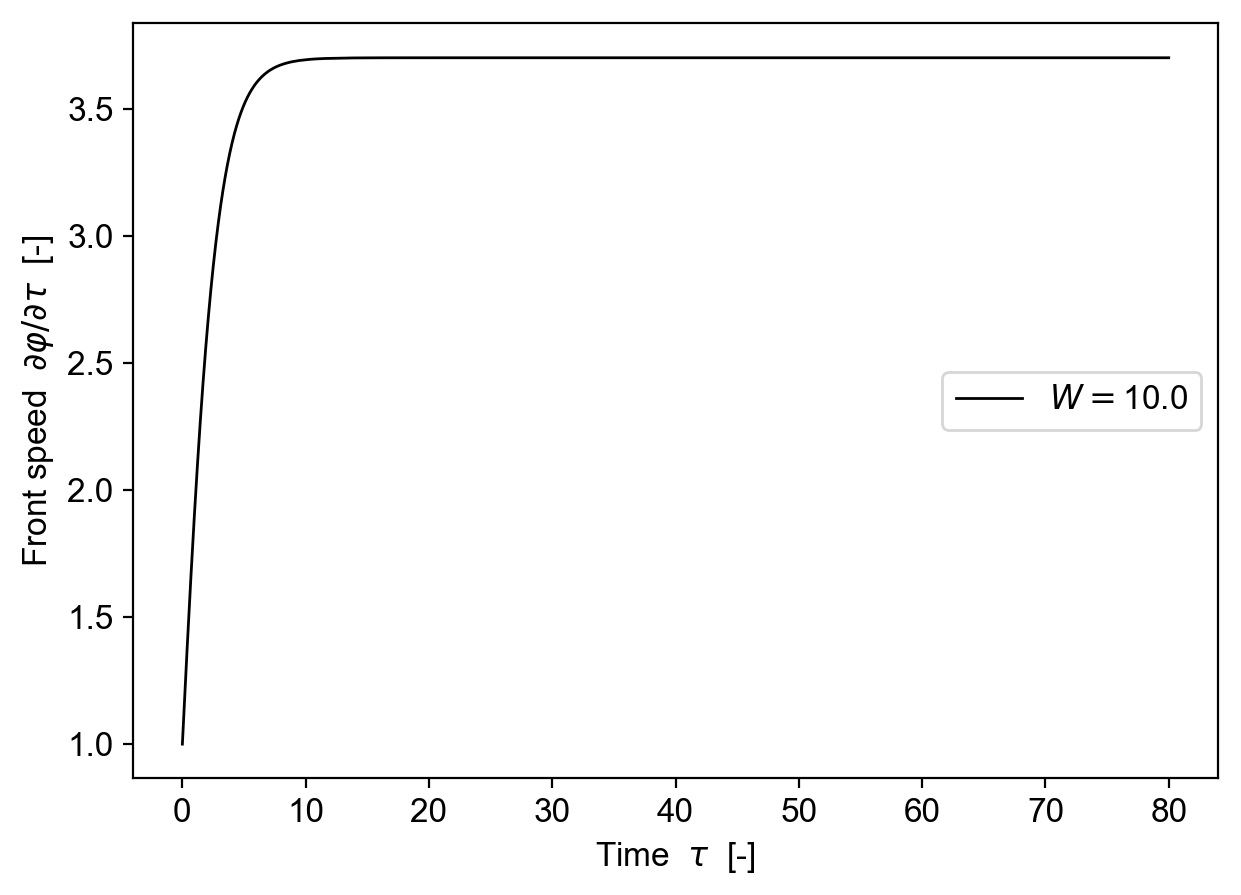

In [22]:
fig_nu_evolution_highW = wme.plot.create_figure('highW_nu_evolution')
wme.plot.plot_nu_evolution(fig_nu_evolution_highW,ew_highW)

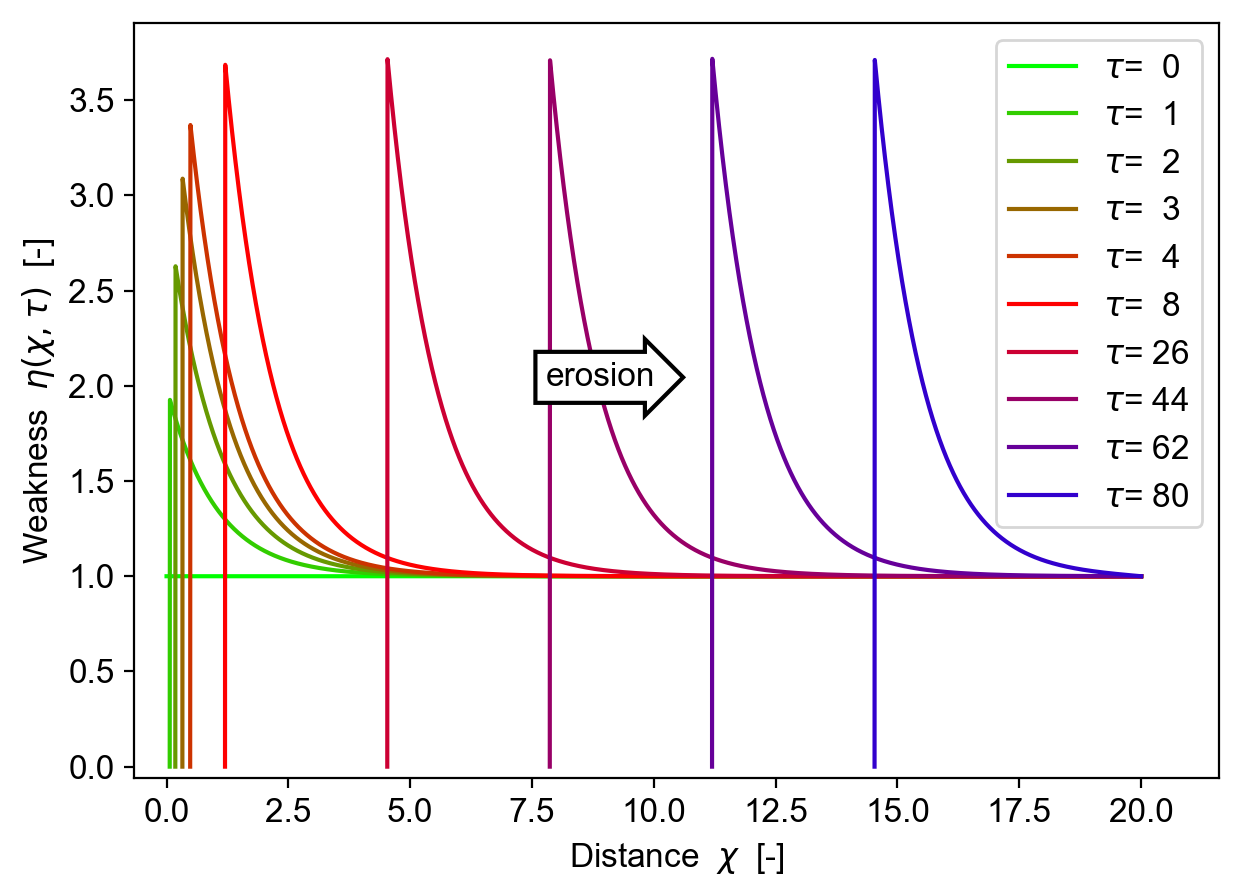

In [23]:
fig_eta_evolution_highW = wme.plot.create_figure('highW_eta_evolution')
wme.plot.plot_eta_evolution(fig_eta_evolution_highW, ew_highW,tc=20,nd=0)

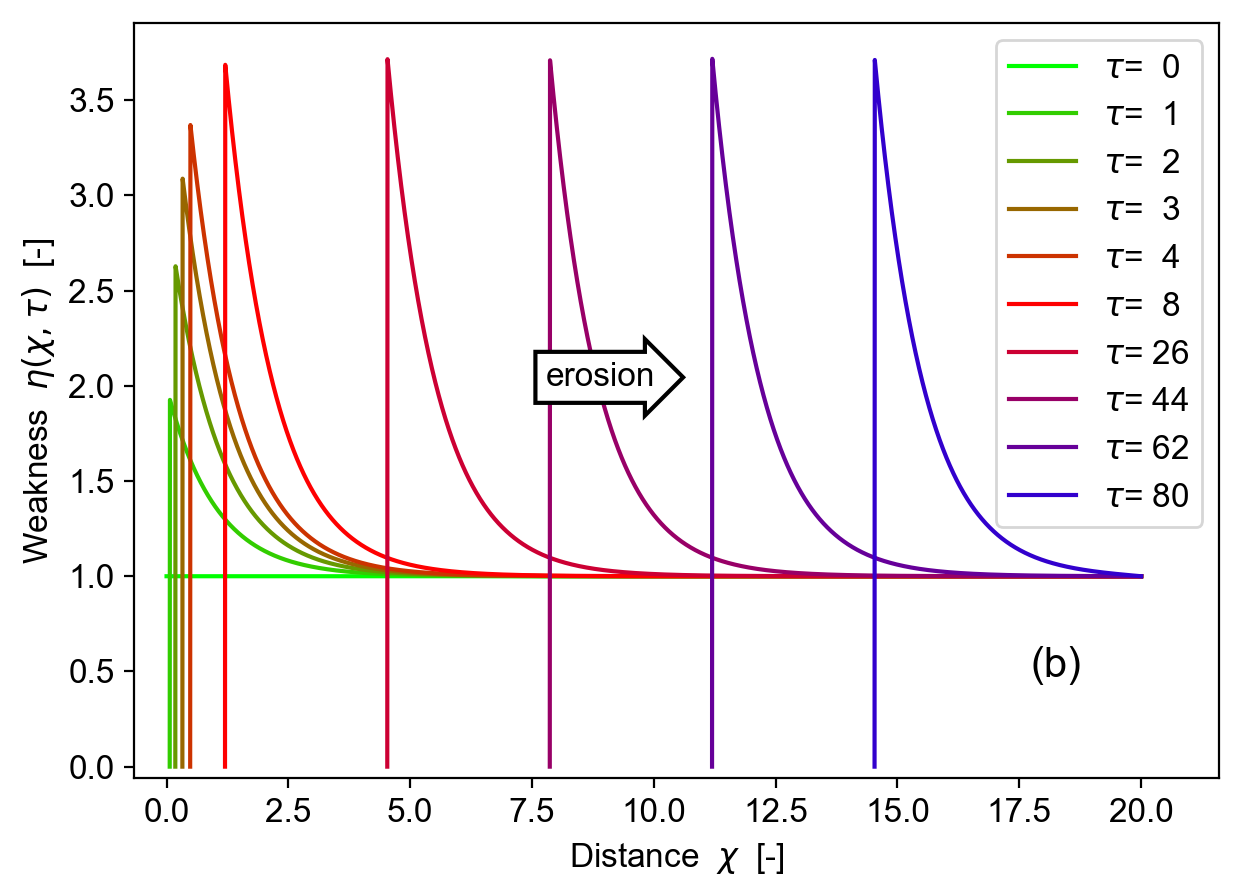

In [24]:
fig_eta_evolution_highW \
    = wme.plot.create_figure('highW_eta_evolution_subfigb')
wme.plot.plot_eta_evolution(fig_eta_evolution_highW, 
                            ew_highW,tc=20,nd=0, 
                            text_label=((0.85,0.15),'(b)',15))

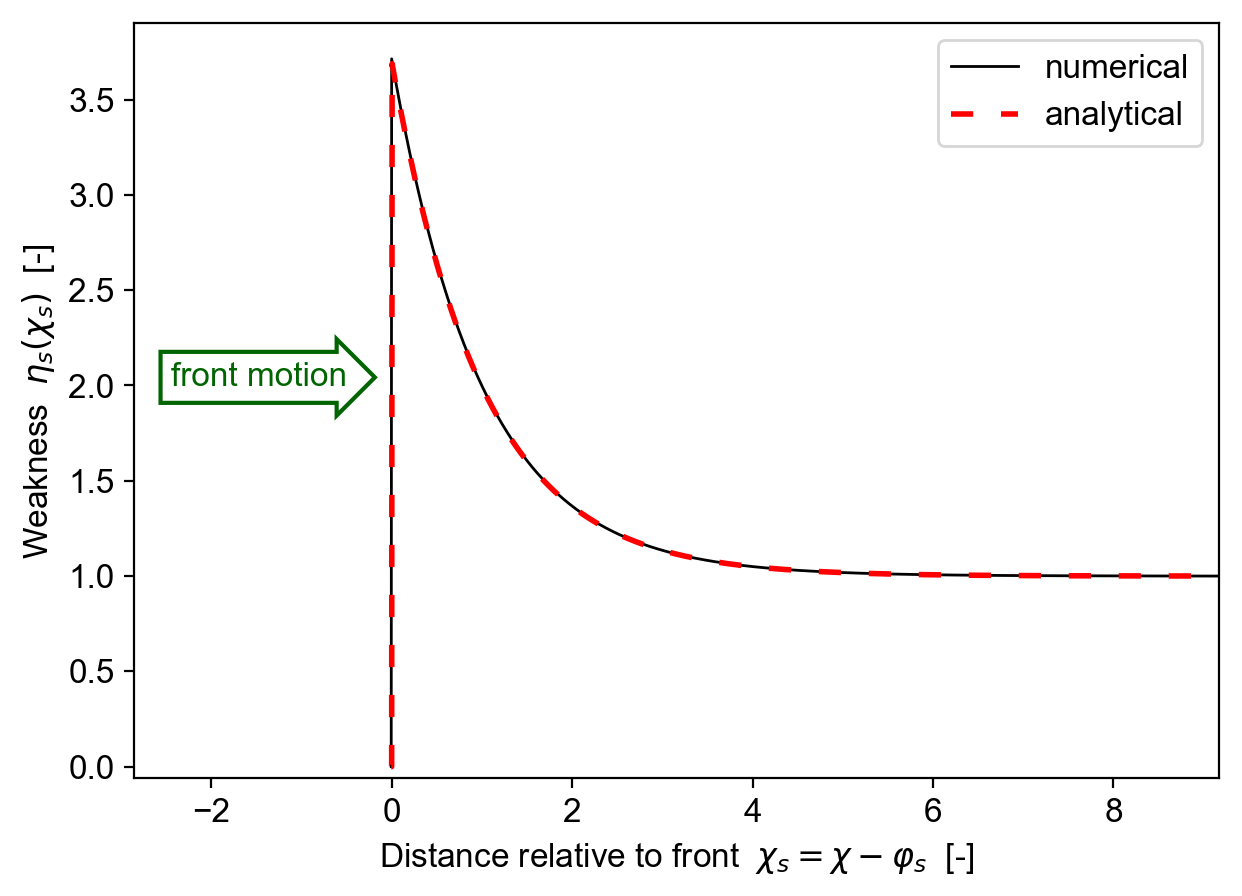

In [25]:
fig_etas_ss_highW = wme.plot.create_figure('highW_etas_ss')
wme.plot.plot_etas_steadystate(fig_etas_ss_highW,ew_highW)

### High transitional $W$

In [26]:
pdict = {
    w_0: np.float64(25),
    v_0: np.float64(10),
    k:   np.float64(1)
}
ndict = {
    chi_domain_size: 20.0,
    tau_domain_size: 80.0,
    Delta_chi      : 0.005,
    Delta_tau      : 0.005
}
ew_highTransW = wme.solve1d.ErosionWeathering(pdict,ndict)
ew_highTransW.ndict
ew_highTransW.solve()
ew_highTransW.pdict

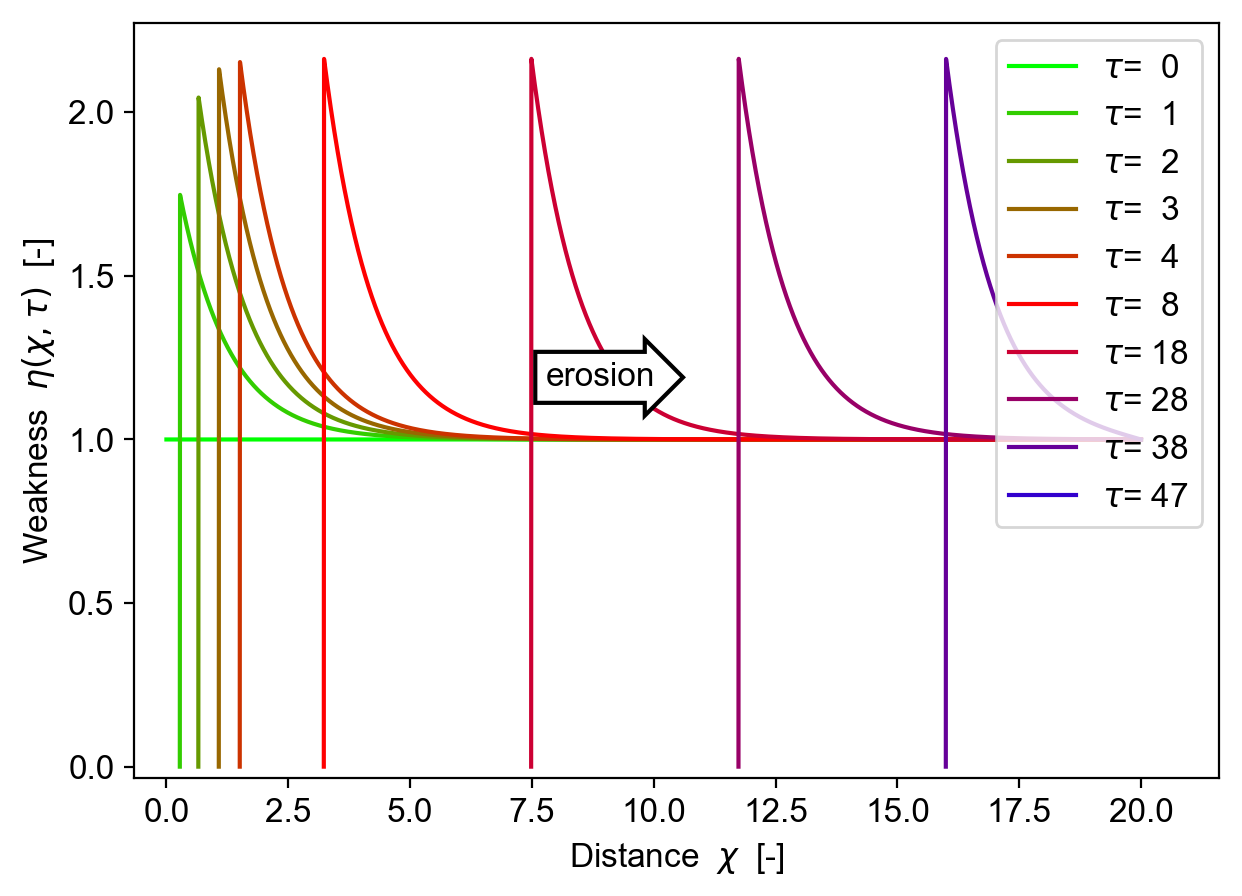

In [27]:
fig_eta_evolution_highTransW \
    = wme.plot.create_figure('highTransW_eta_evolution')
wme.plot.plot_eta_evolution(fig_eta_evolution_highTransW, ew_highTransW,
                        tc=20,nd=0)

### Low-transitional $W$

In [28]:
pdict = {
    w_0: np.float64(2.5),
    v_0: np.float64(10),
    k:   np.float64(1)
}
ndict = {
    chi_domain_size: 30.0,
    tau_domain_size: 10.0,
    Delta_chi      : 0.01,
    Delta_tau      : 0.003
}
ew_lowTransW = wme.solve1d.ErosionWeathering(pdict,ndict)
ew_lowTransW.ndict
ew_lowTransW.solve()
ew_lowTransW.pdict

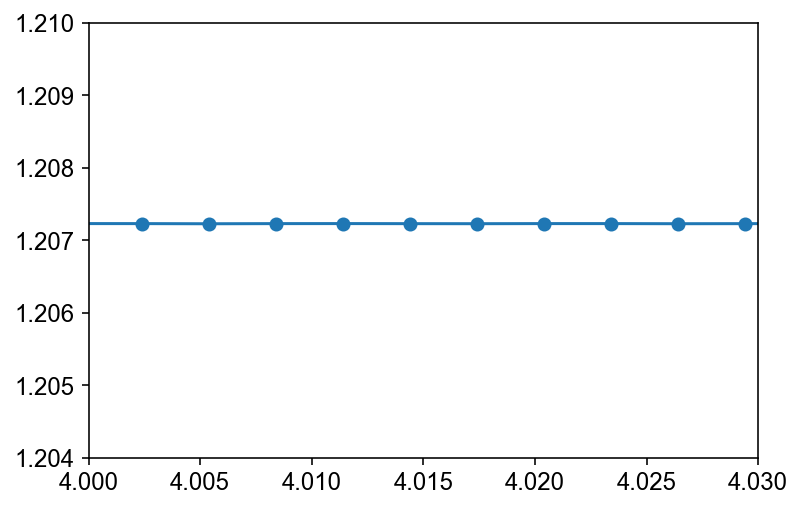

In [29]:
wme.plot.stability_check(ew_lowTransW.tau_array,ew_lowTransW.nu_array)

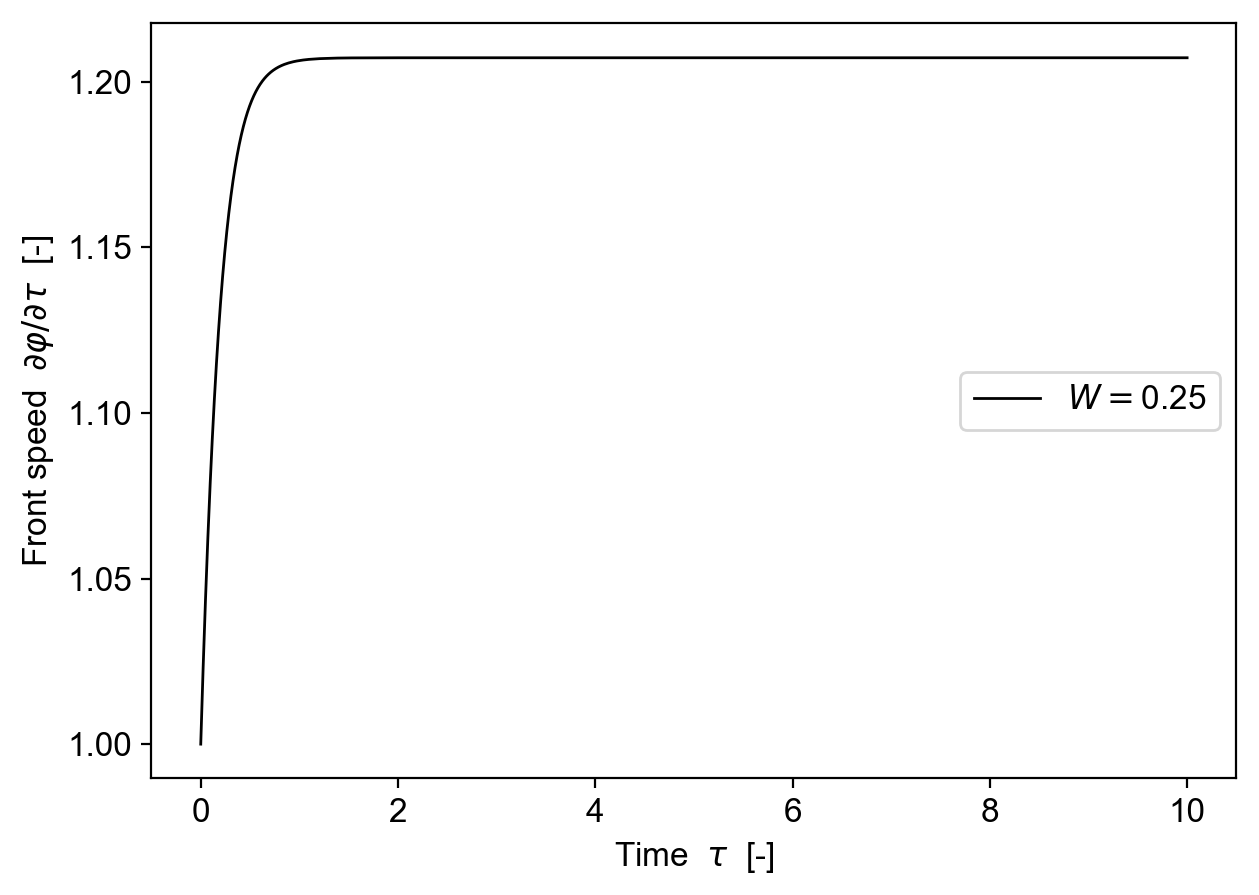

In [30]:
fig_nu_evolution_lowTransW \
    = wme.plot.create_figure('lowTransW_nu_evolution')
wme.plot.plot_nu_evolution(fig_nu_evolution_lowTransW,ew_lowTransW)

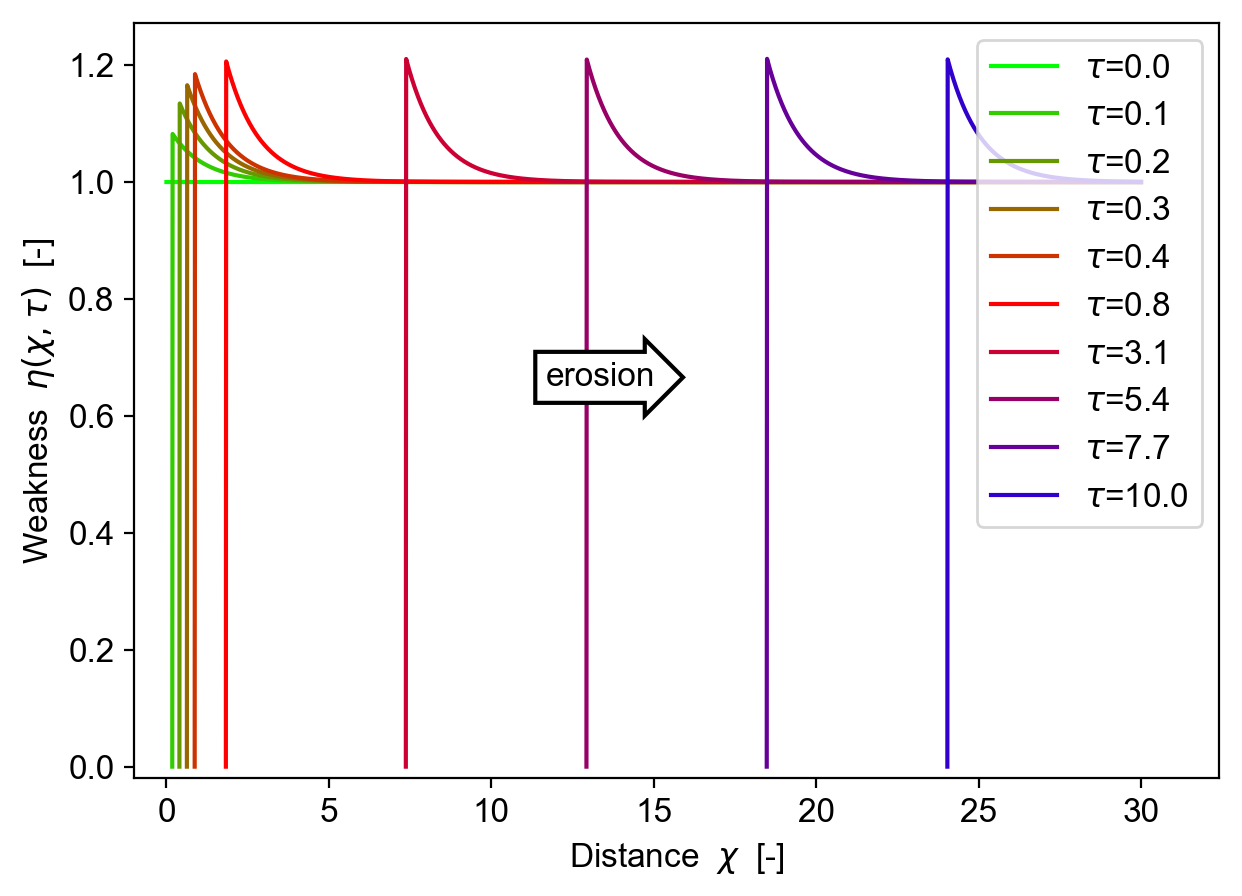

In [31]:
fig_eta_evolution_lowTransW \
    = wme.plot.create_figure('lowTransW_eta_evolution')
wme.plot.plot_eta_evolution(fig_eta_evolution_lowTransW, 
                            ew_lowTransW, tc=25, 
                            nd=1)

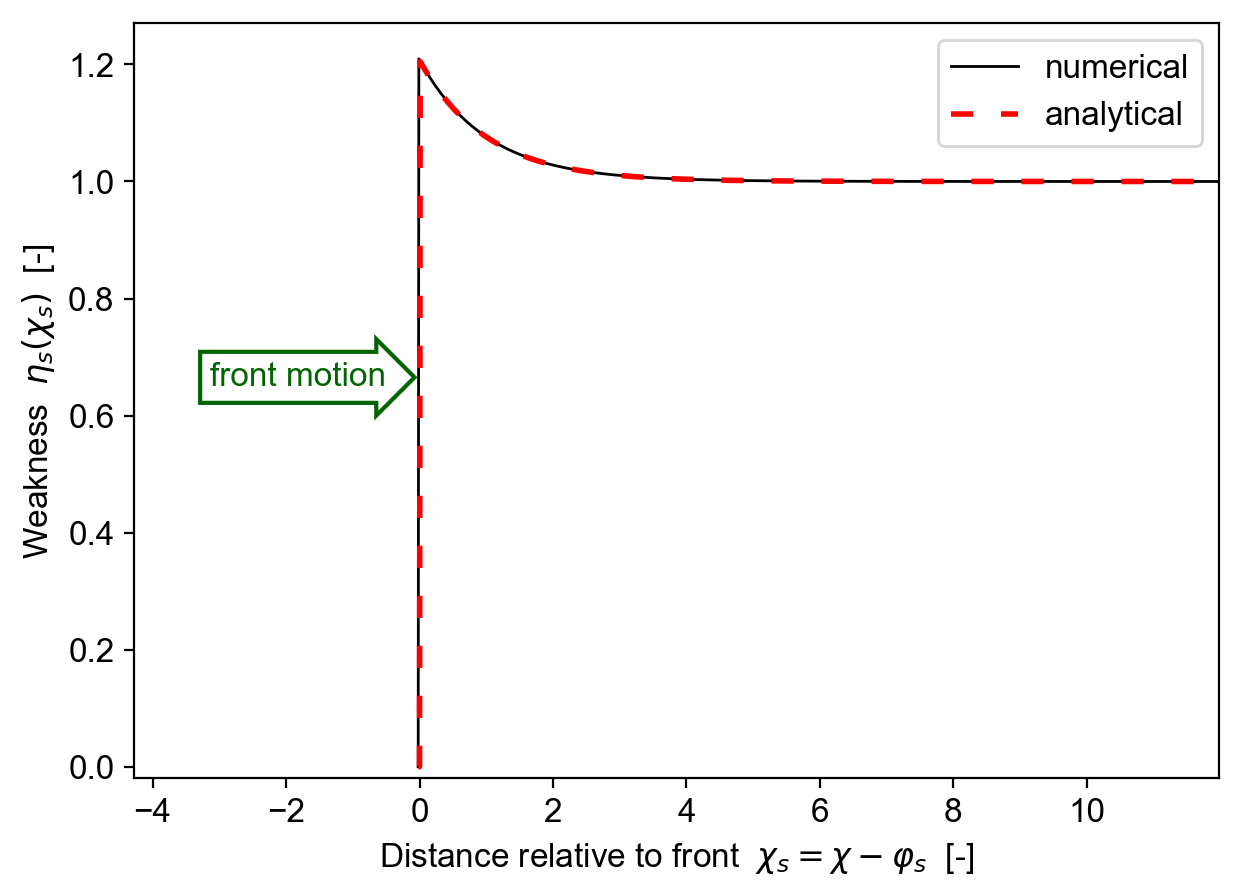

In [32]:
fig_etas_ss_lowTransW = wme.plot.create_figure('lowTransW_etas_ss')
wme.plot.plot_etas_steadystate(fig_etas_ss_lowTransW,ew_lowTransW)

### Low $W$

In [33]:
pdict = {
    w_0: np.float64(0.25),
    v_0: np.float64(10),
    k:   np.float64(1)
}
ndict = {
    chi_domain_size: 30.0,
    tau_domain_size: 1.0,
    Delta_chi      : 0.01,
    Delta_tau      : 0.0003
}
ew_lowW = wme.solve1d.ErosionWeathering(pdict,ndict)
ew_lowW.ndict
ew_lowW.solve()
ew_lowW.pdict

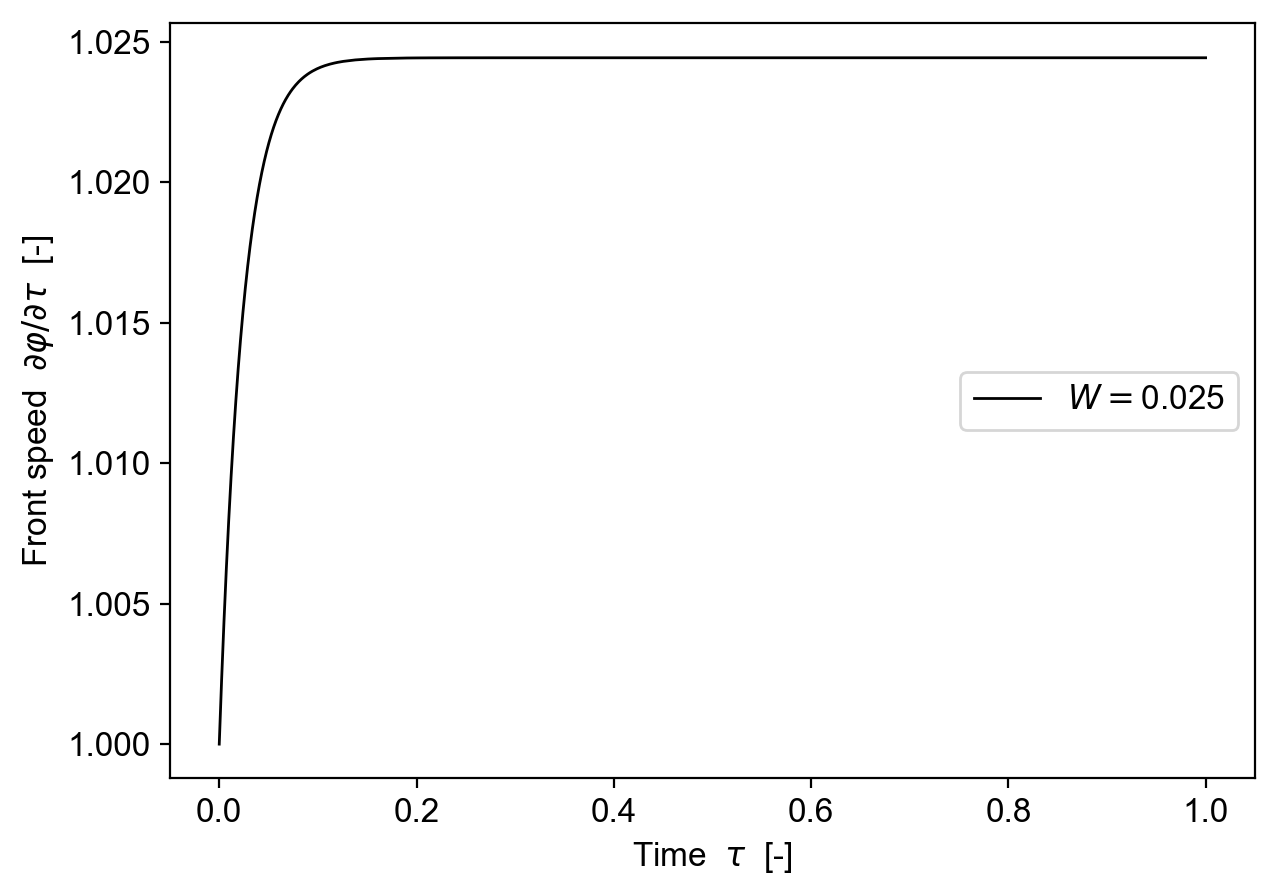

In [34]:
fig_nu_evolution_lowW = wme.plot.create_figure('lowW_nu_evolution')
wme.plot.plot_nu_evolution(fig_nu_evolution_lowW,ew_lowW)

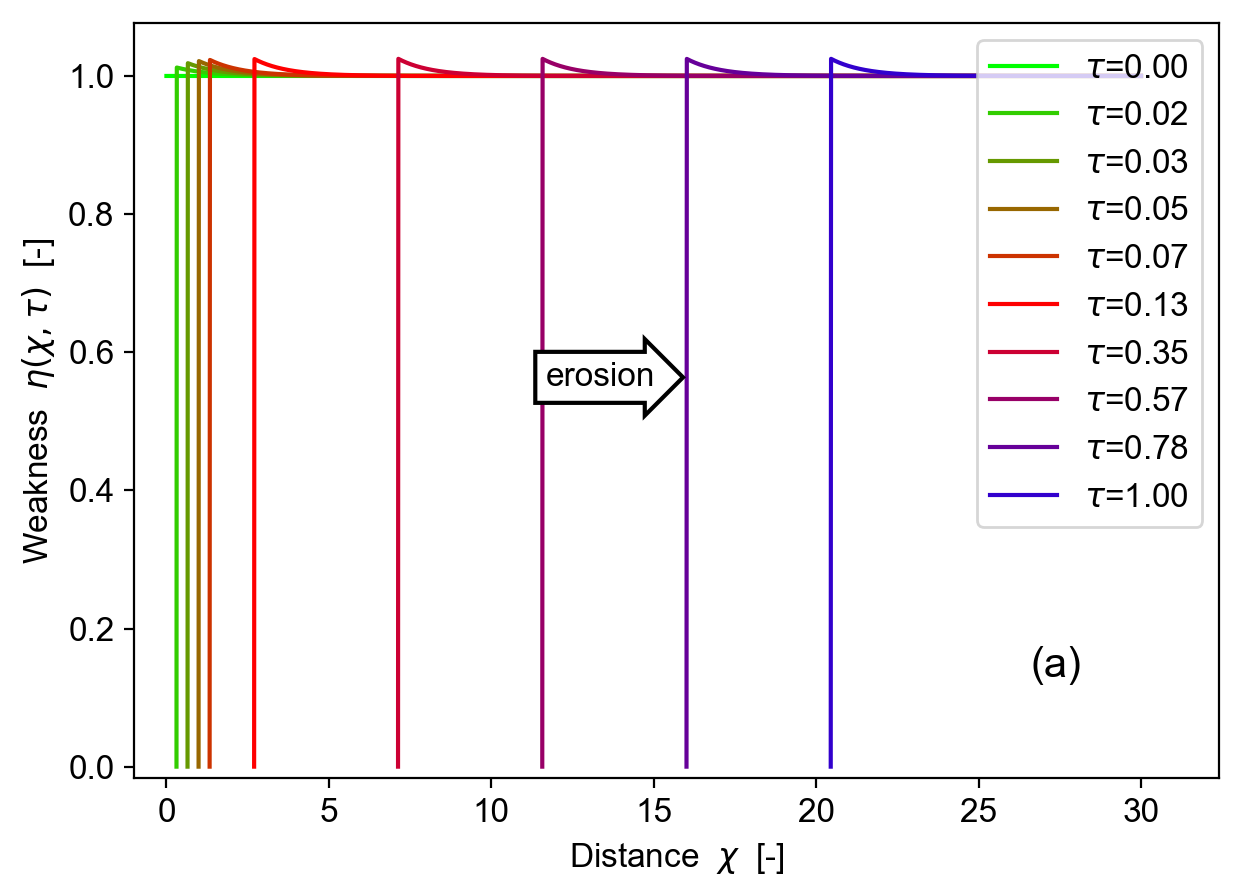

In [35]:
fig_eta_evolution_lowW \
    = wme.plot.create_figure('lowW_eta_evolution_subfiga')
wme.plot.plot_eta_evolution(fig_eta_evolution_lowW, ew_lowW, tc=15,  
                             text_label=((0.85,0.15),'(a)',15))

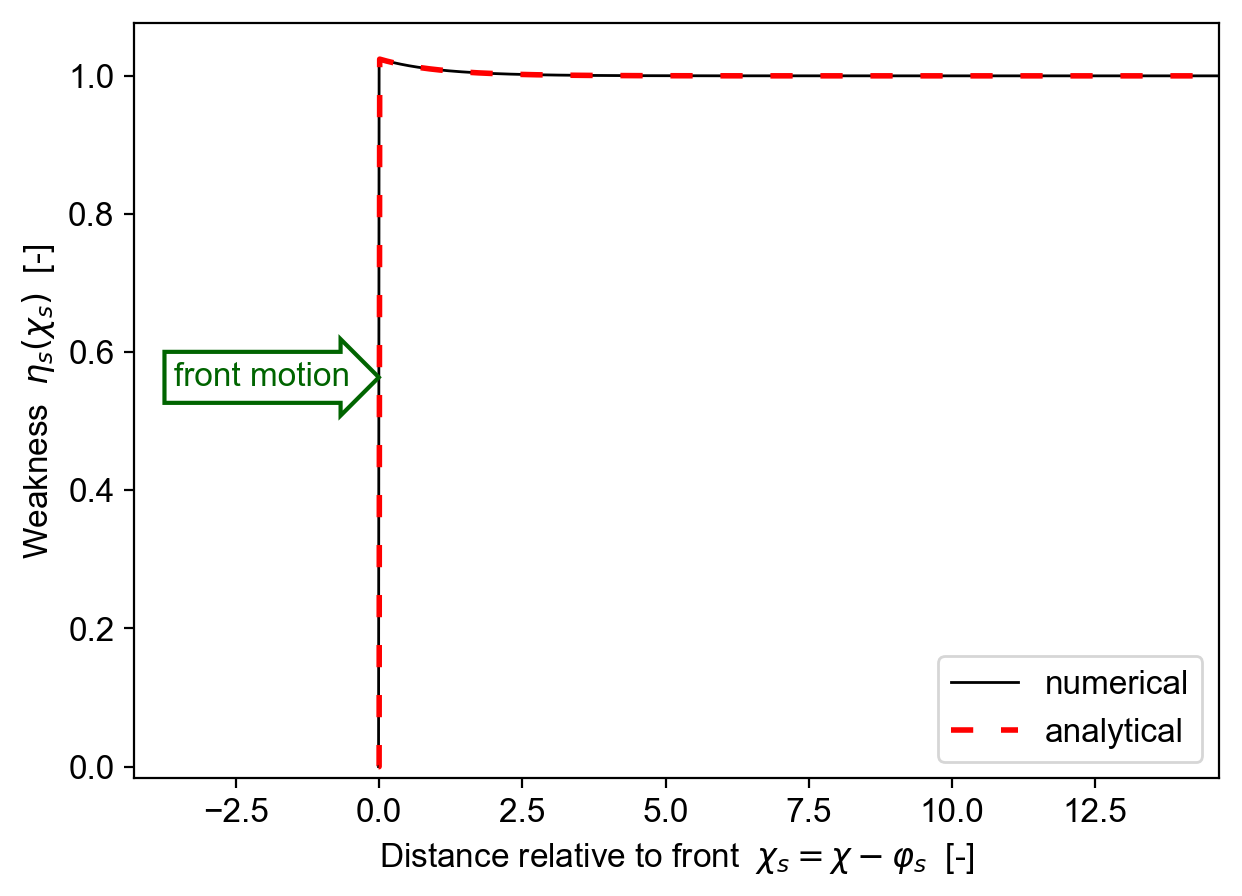

In [36]:
fig_etas_ss_lowW = wme.plot.create_figure('lowW_etas_ss')
wme.plot.plot_etas_steadystate(fig_etas_ss_lowW,ew_lowW)

### Comparison

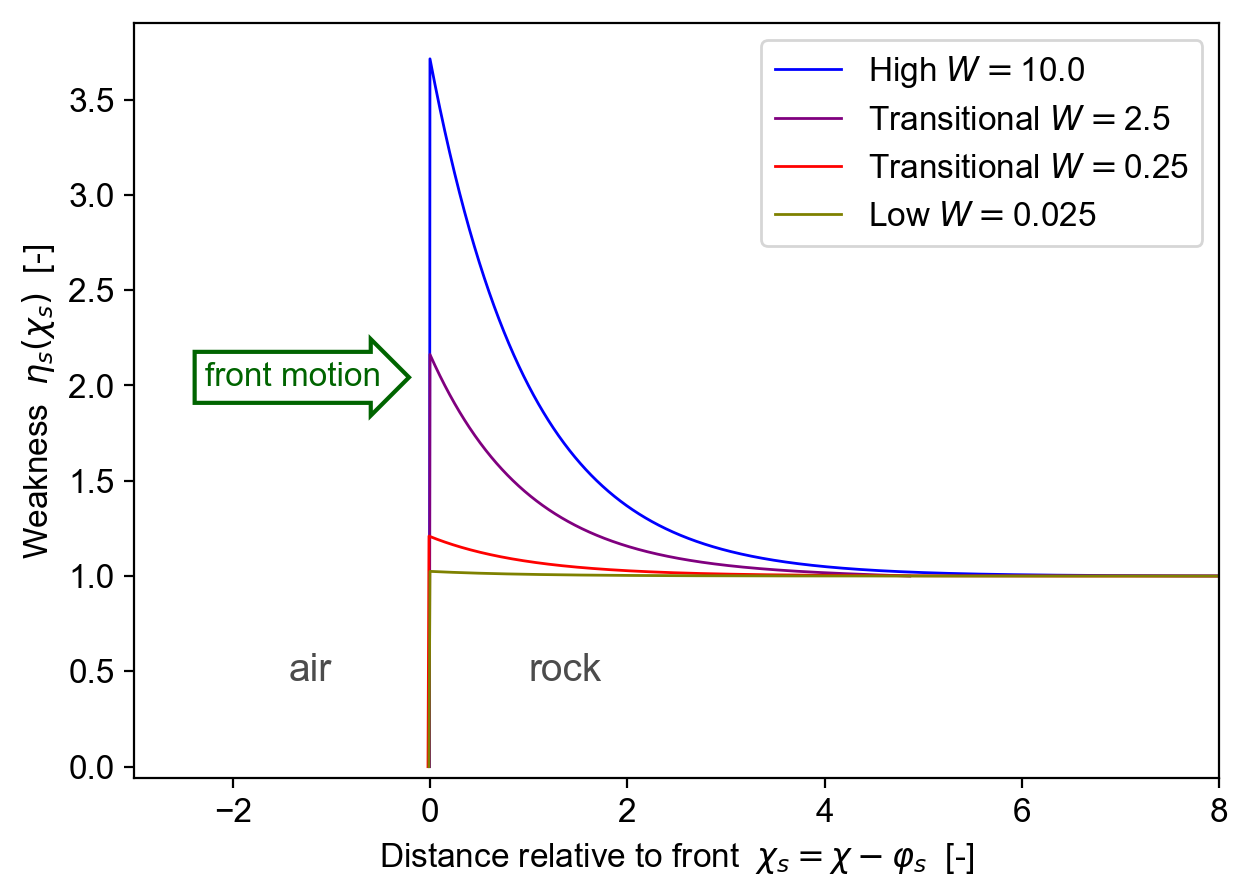

In [37]:
fig_etas_ss_setW = wme.plot.create_figure('etas_setW_ss')
wme.plot.plot_etas_steadystate_set(fig_etas_ss_setW, 
     [(ew_highW,'High $W=$'+str(ew_highW.pdict[W])),
      (ew_highTransW,'Transitional $W=$'+str(ew_highTransW.pdict[W])),
      (ew_lowTransW,'Transitional $W=$'+str(ew_lowTransW.pdict[W])),
      (ew_lowW,'Low $W=$'+str(ew_lowW.pdict[W]))])

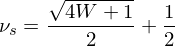

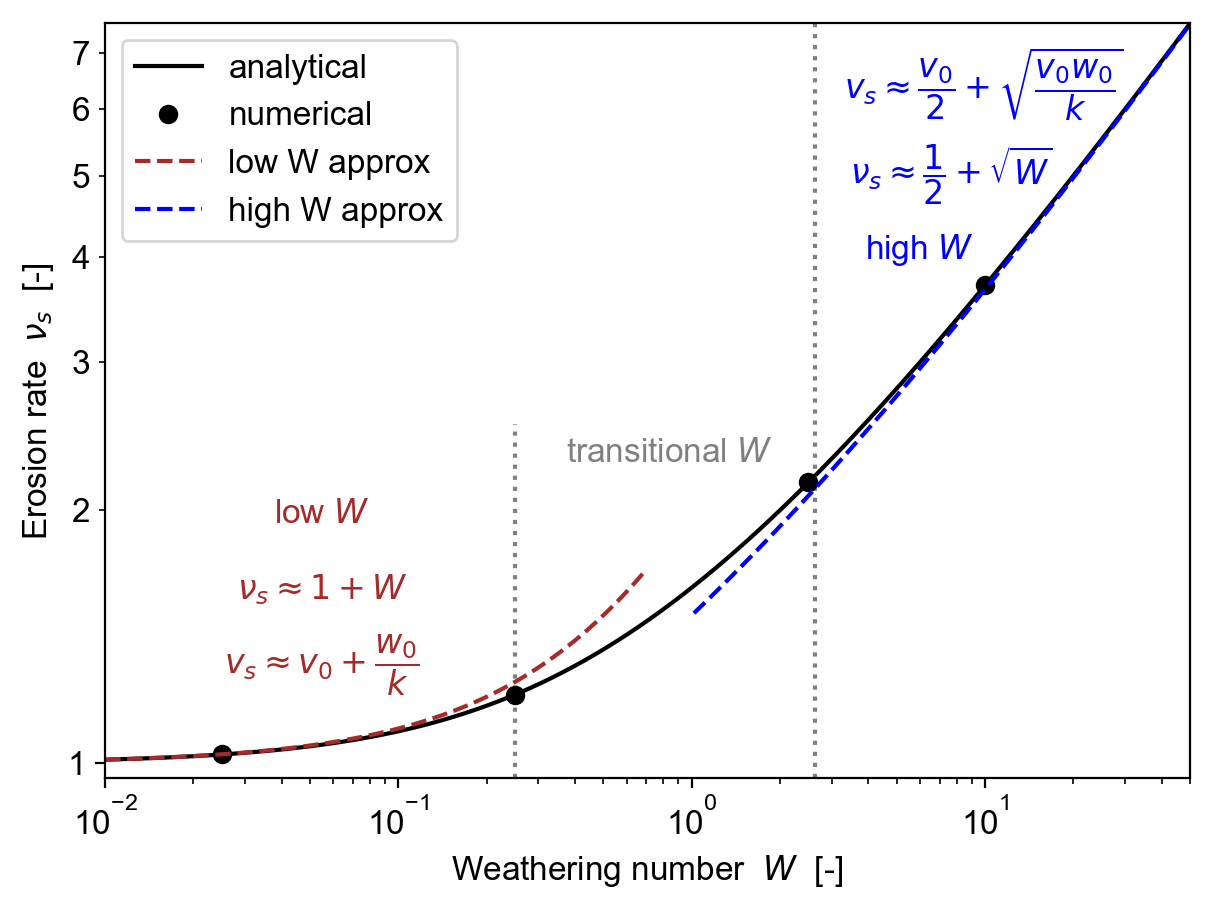

In [38]:
fig_nu_s = wme.plot.create_figure('nu_s')
em.nus_eqn_W
nus_solns_list = [ew_lowW,ew_lowTransW,ew_highTransW,ew_highW]
wme.plot.plot_nus_W(fig_nu_s, em, 
                    do_loglog=True, nus_solns_list=nus_solns_list)

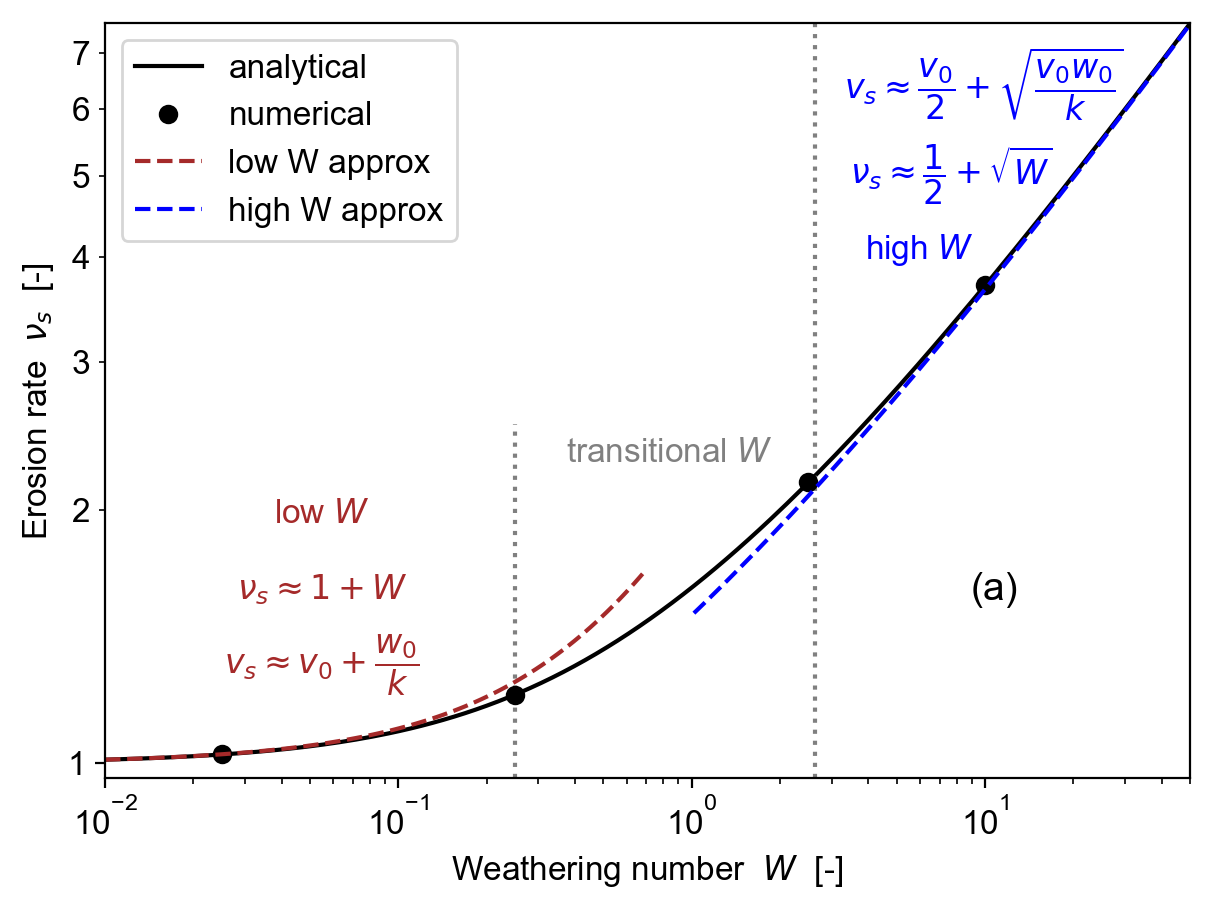

In [39]:
fig_nu_s_subfiga = wme.plot.create_figure('nu_s_subfiga')
nus_solns_list = [ew_lowW,ew_lowTransW,ew_highTransW,ew_highW]
wme.plot.plot_nus_W(fig_nu_s, em,
                    do_loglog=True, nus_solns_list=nus_solns_list, 
                    text_label='(a)')

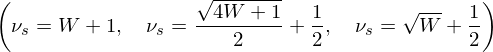

In [40]:
nus_eqn = sy.Eq( nu_s, (1+sy.sqrt(1+4*W))/2 )
nus_lowW_eqn = sy.Eq( nu_s, 1+W )
nus_highW_eqn = sy.Eq( nu_s, ((sy.Rational(1,2)+sy.sqrt(W))) )
nus_lowW_eqn, nus_eqn, nus_highW_eqn
nus_lowW_error = (nus_lowW_eqn.rhs/nus_eqn.rhs)\
                    .subs({W:sy.Rational(1,4)}).simplify()

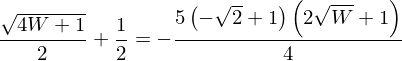

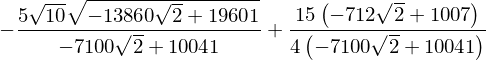

In [41]:
sy.simplify( sy.Eq(nus_eqn.rhs,nus_highW_eqn.rhs*nus_lowW_error) )
nus_highW_lim=sy.solve(_,W)[0]
nus_highW_lim
sy.N(nus_highW_lim)

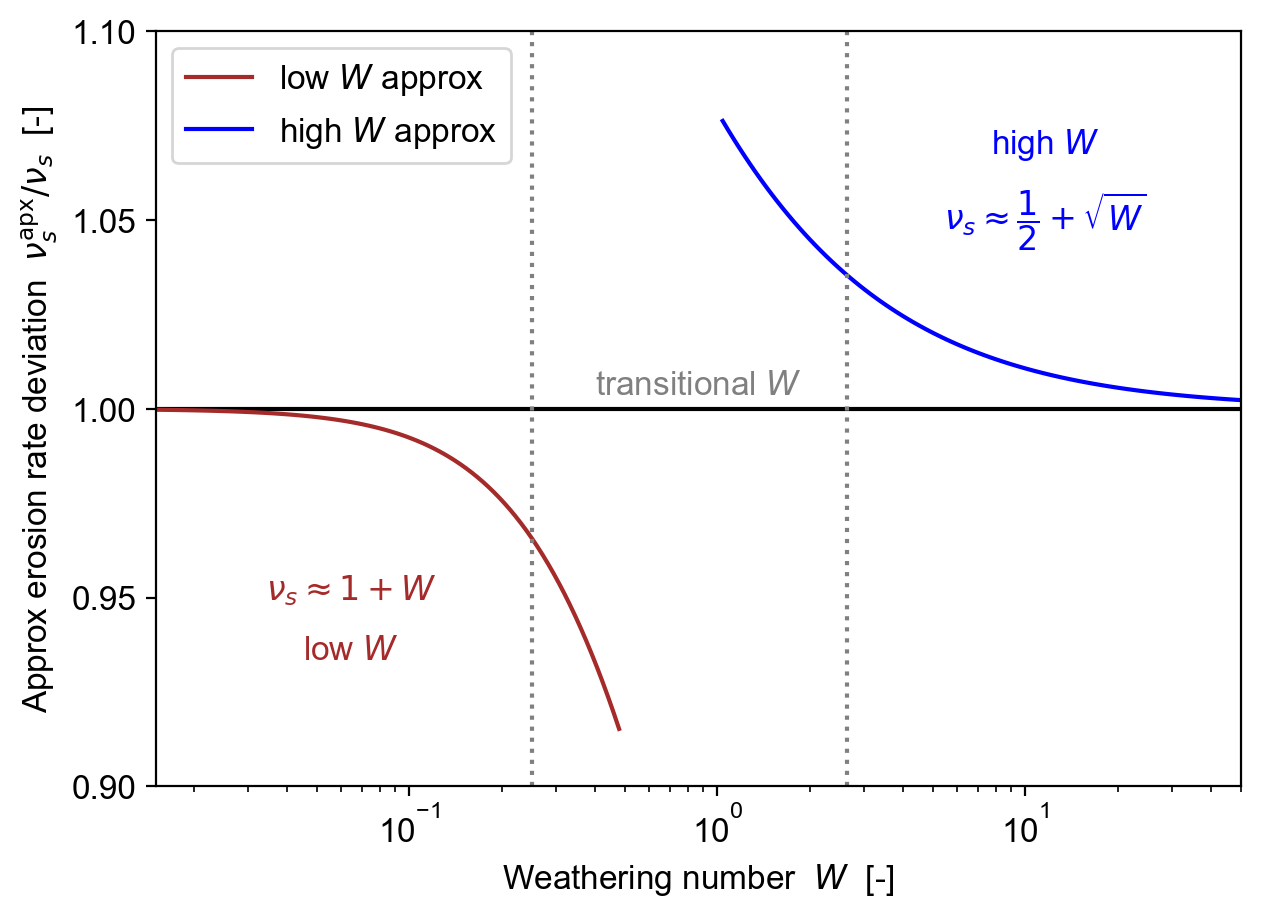

In [42]:
fig_nu_s_approx_devn = wme.plot.create_figure('nu_s_approx_devn')
wme.plot.plot_nus_W_transition(fig_nu_s, em)

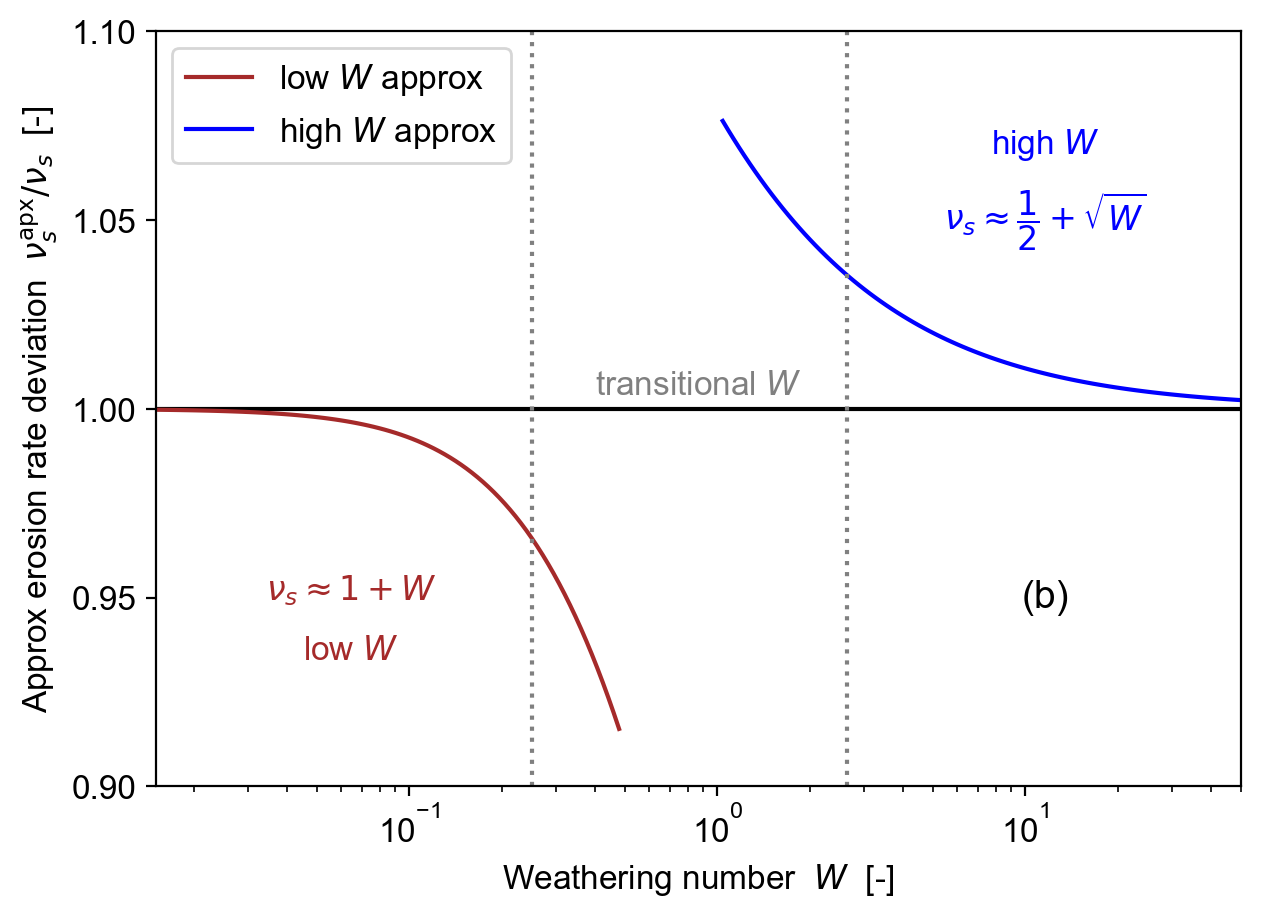

In [43]:
fig_nu_s_approx_devn_subfigb \
    = wme.plot.create_figure('nu_s_approx_devn_subfigb')
wme.plot.plot_nus_W_transition(fig_nu_s, em, text_label='(b)')

## Application

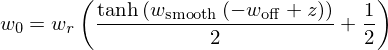

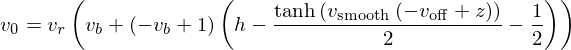

In [44]:
em.w0_eqn_wr_z
em.v0_eqn_vr_h_z

In [45]:
pdict = {
    v_r:1, v_b:0.05, h:1,
    v_smooth:10, v_off:0.1,
    w_r:1.5, k:1, w_smooth:50, w_off:0.1
}
pdict
cw_highW = wme.solve1p1d.ChannelWall(em, pdict)
cw = cw_highW
cw.compute_vertical_profiles(n_pts=200)
cw.compute_cross_section()
# cw.v0_eqn_vr_h_z
# cw.w0_eqn_wr_z
# cw.vs_calibrated

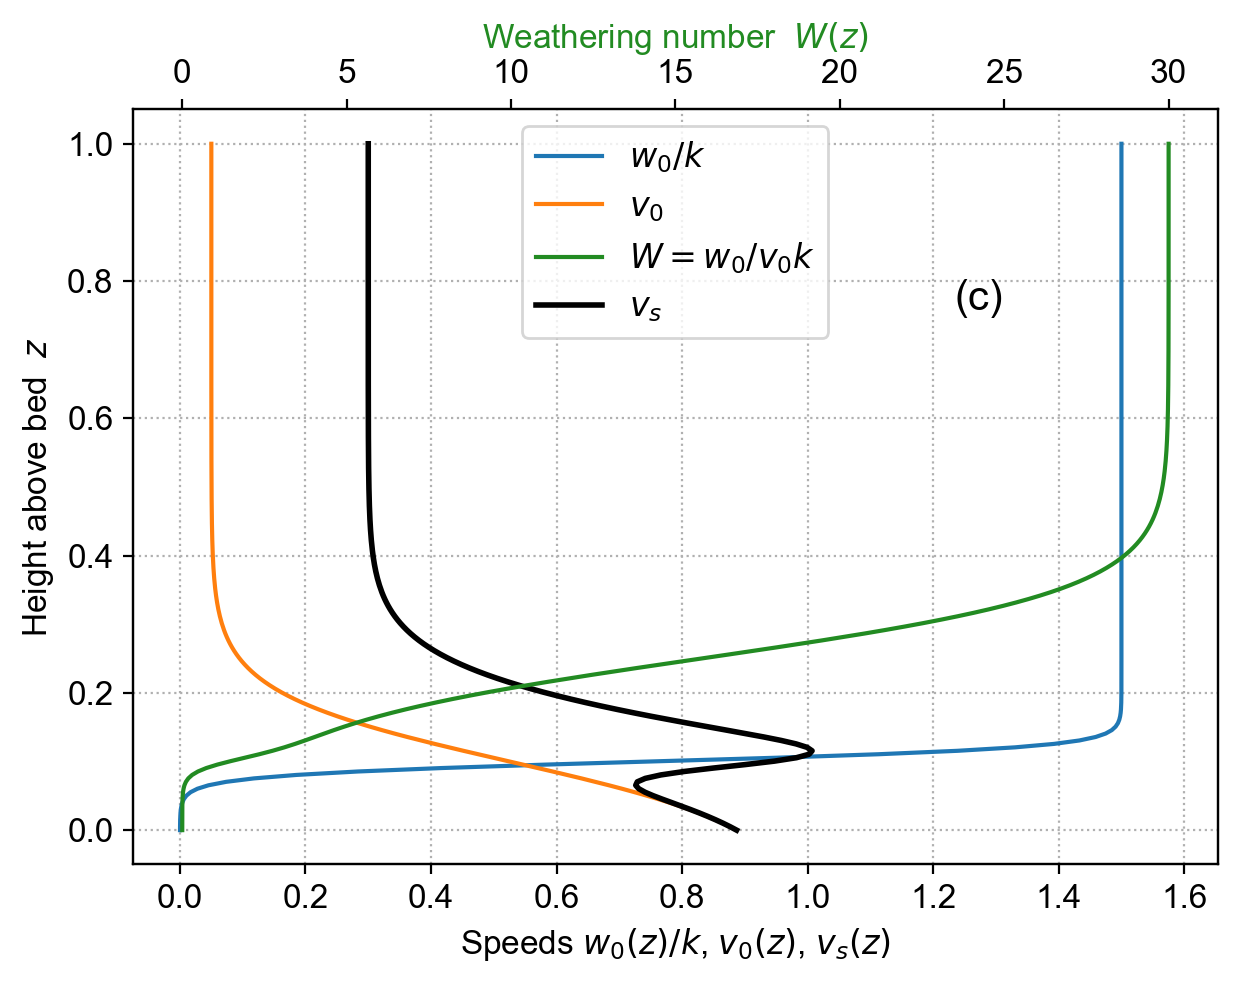

In [46]:
fig_z_w0_v0_vs_W_highW = wme.plot.create_figure('z_w0_v0_vs_W_highW')
wme.plot.plot_channel_w0_v0_W(fig_z_w0_v0_vs_W_highW, cw_highW,
                              text_label=((0.78,0.75),'(c)',15))

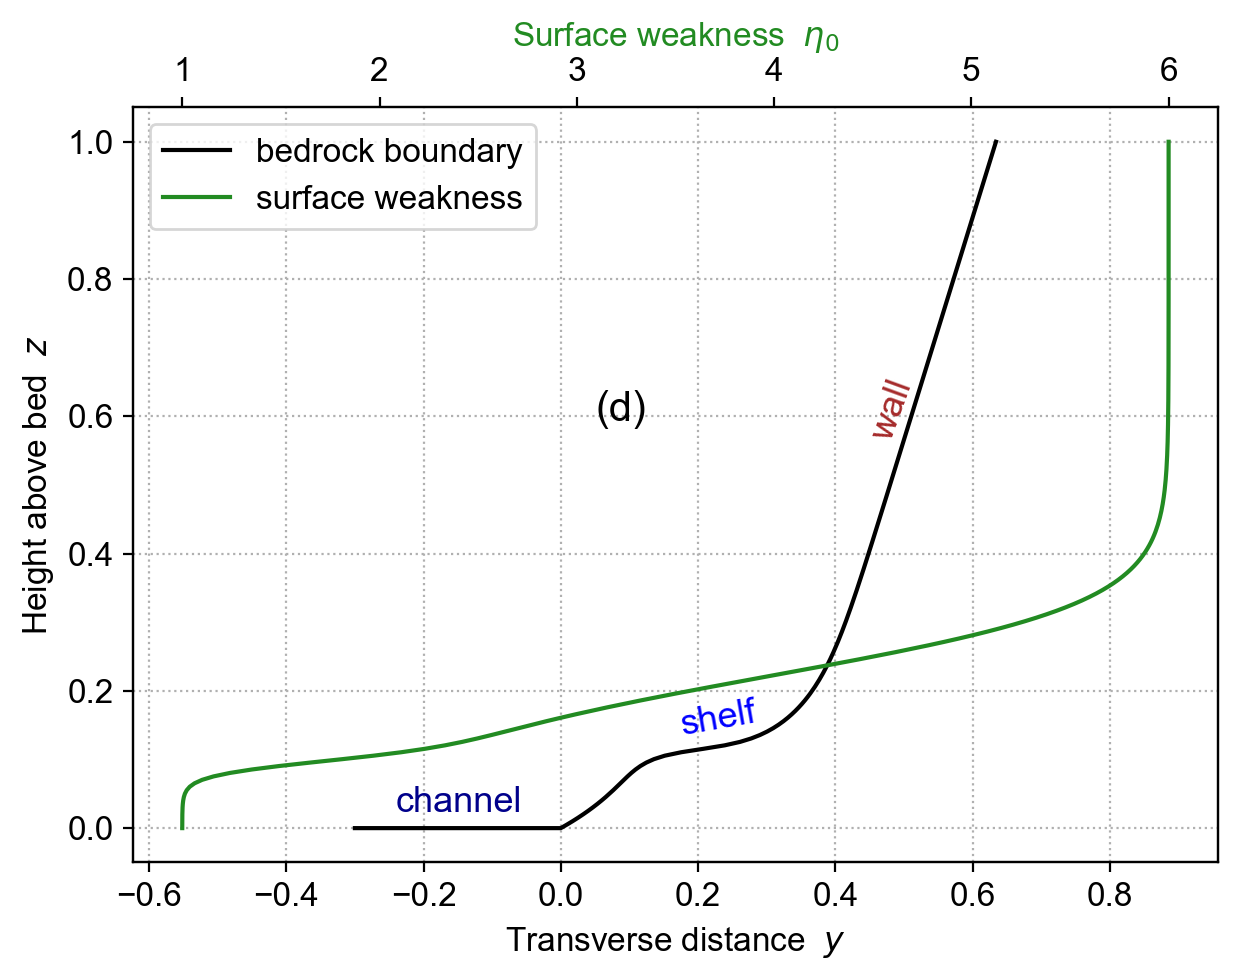

In [47]:
z_label = 'Height above bed  $z$'
fig_z_y_highW = wme.plot.create_figure('z_y_highW')
wme.plot.plot_channel_generic(fig_z_y_highW,       
        [(cw_highW.ch_z_array, z_label,
          cw_highW.ch_y_array,'Transverse distance  $y$',
          'bedrock boundary'), 
        (cw_highW.z_array, '',
          cw_highW.eta0_array,'Surface weakness  $\eta_0$',
          'surface weakness')], 
          do_equal_aspect=True,
          text_labels=[((0.45,0.6),'(d)',15,'k',0),
                       ((0.3,0.08),'channel',13,'DarkBlue',0),
                       ((0.54,0.19),'shelf',13,'b',10),
                       ((0.7,0.6),'wall',13,'brown',70)]
        )

In [48]:
pdict = {
    v_r:1, v_b:0.05, h:1,
    v_smooth:10, v_off:0.1,
    w_r:0.11, k:1, w_smooth:50, w_off:0.1
}
pdict
cw_transW = wme.solve1p1d.ChannelWall(em, pdict)
cw = cw_transW
cw.compute_vertical_profiles(n_pts=200)
cw.compute_cross_section()
# cw.v0_eqn_vr_h_z
# cw.w0_eqn_wr_z
# cw.vs_calibrated

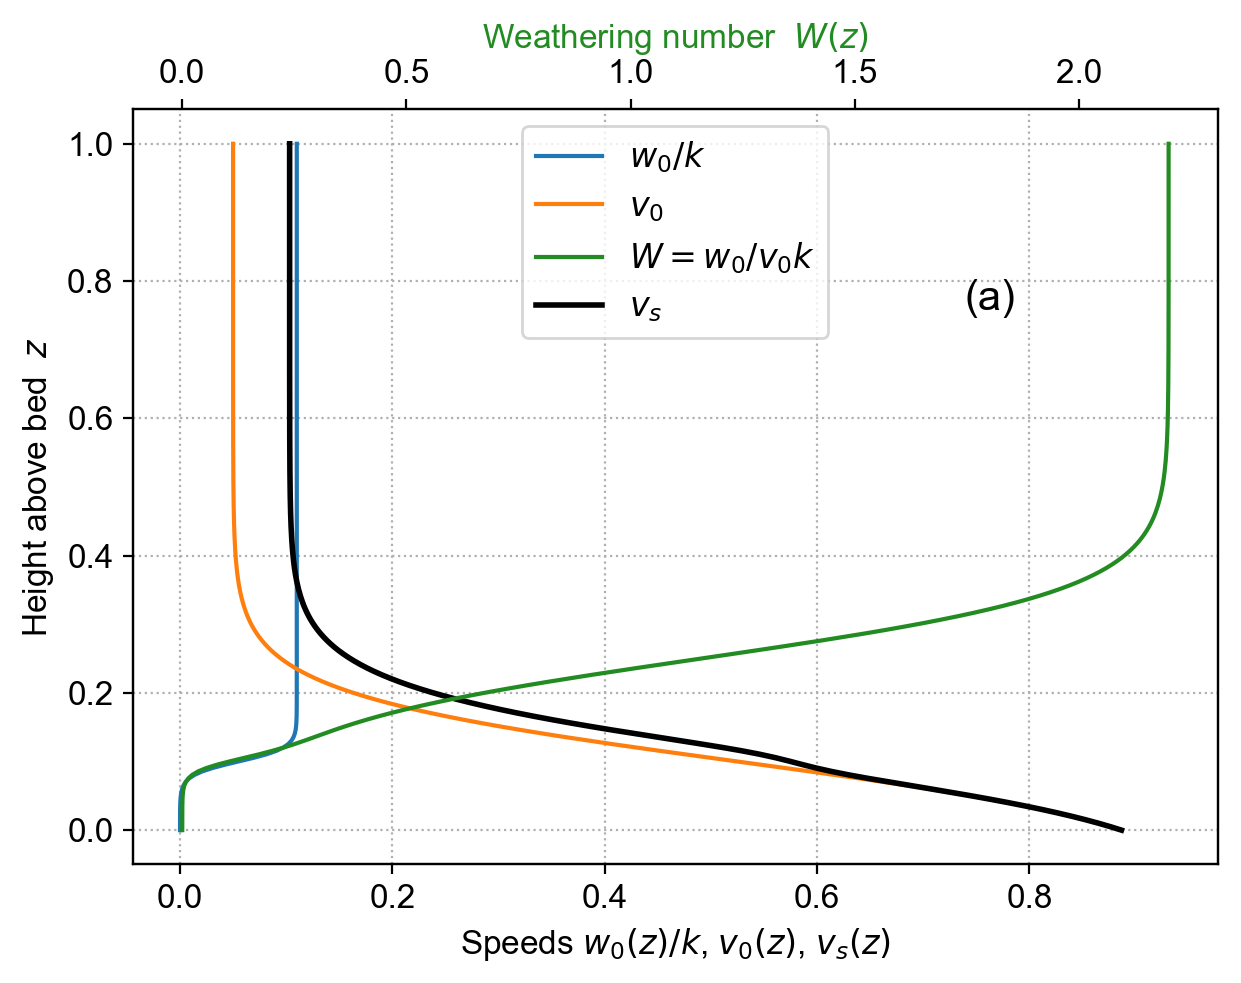

In [49]:
fig_z_w0_v0_vs_W_transW = wme.plot.create_figure('z_w0_v0_vs_W_transW')
wme.plot.plot_channel_w0_v0_W(fig_z_w0_v0_vs_W_transW, cw_transW,
                             text_label=((0.79,0.75),'(a)',15))

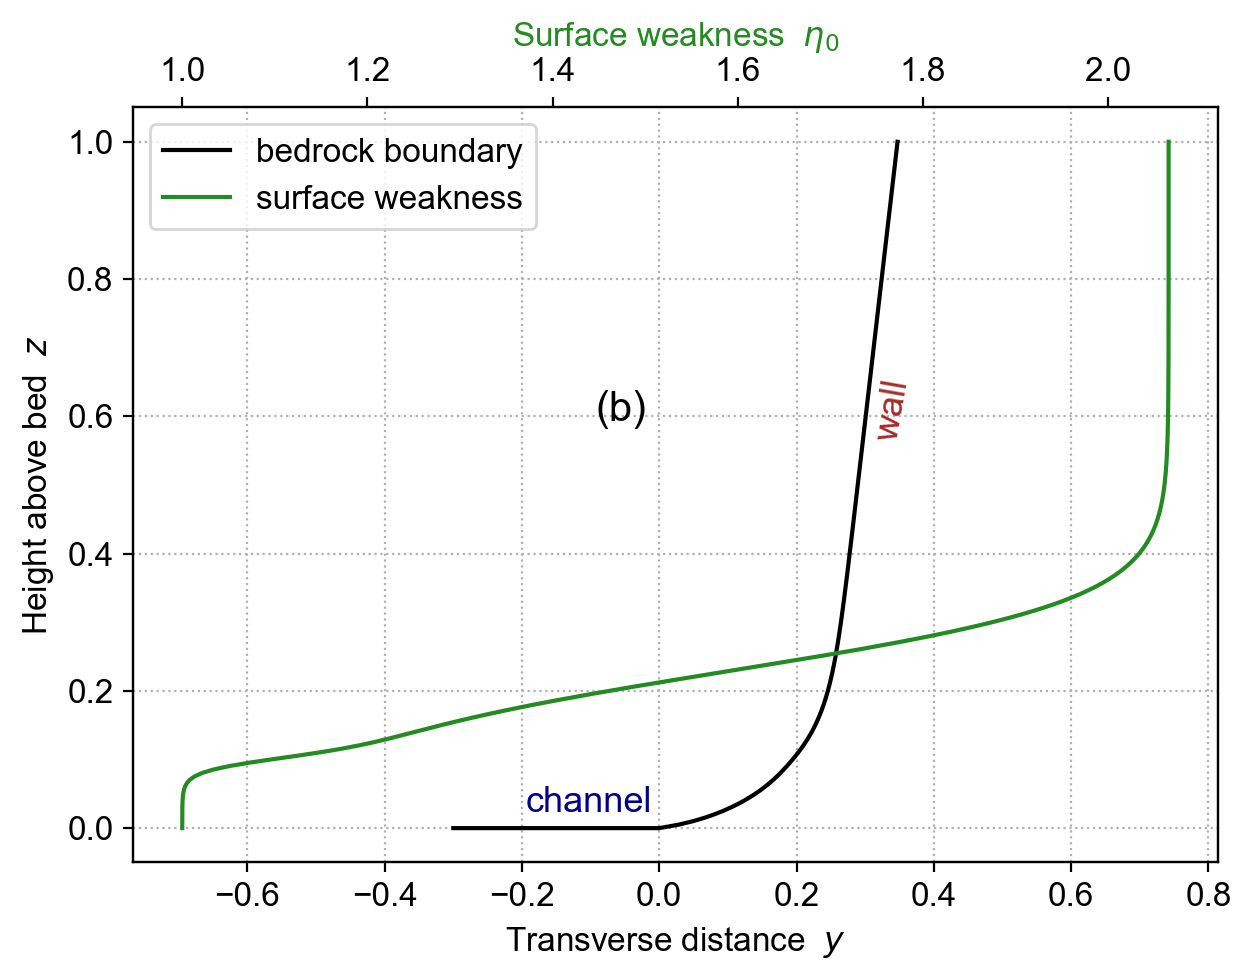

In [50]:
z_label = 'Height above bed  $z$'
fig_z_y_transW = wme.plot.create_figure('z_y_transW')
wme.plot.plot_channel_generic(fig_z_y_transW, 
        [(cw_transW.ch_z_array, z_label,
          cw_transW.ch_y_array,'Transverse distance  $y$',
          'bedrock boundary'), 
        (cw_transW.z_array, '',
          cw_transW.eta0_array,'Surface weakness  $\eta_0$',
          'surface weakness')], 
          do_equal_aspect=True,
          text_labels=[((0.45,0.6),'(b)',15,'k',0),
                       ((0.42,0.08),'channel',13,'DarkBlue',0),
                       ((0.7,0.6),'wall',13,'brown',80)]
                             )

## Export

In [51]:
results_dir = wme.save.create_plots_dir()

In [52]:
wme.save.export_plots(wme.plot.fdict,results_dir,'pdf')

Exported "inoue_w_wetdry.pdf"
Exported "li_w_wetdryN.pdf"
Exported "li_w_P.pdf"
Exported "li_w_normed_P.pdf"
Exported "li_w_wetdryN_P.pdf"
Exported "highW_nu_evolution.pdf"
Exported "highW_eta_evolution.pdf"
Exported "highW_eta_evolution_subfigb.pdf"
Exported "highW_etas_ss.pdf"
Exported "highTransW_eta_evolution.pdf"
Exported "lowTransW_nu_evolution.pdf"
Exported "lowTransW_eta_evolution.pdf"
Exported "lowTransW_etas_ss.pdf"
Exported "lowW_nu_evolution.pdf"
Exported "lowW_eta_evolution_subfiga.pdf"
Exported "lowW_etas_ss.pdf"
Exported "etas_setW_ss.pdf"
Exported "nu_s.pdf"
Exported "nu_s_subfiga.pdf"
Exported "nu_s_approx_devn.pdf"
Exported "nu_s_approx_devn_subfigb.pdf"
Exported "z_w0_v0_vs_W_highW.pdf"
Exported "z_y_highW.pdf"
Exported "z_w0_v0_vs_W_transW.pdf"
Exported "z_y_transW.pdf"


In [53]:
fig = 'highW_eta_evolution'
wme.save.export_plots({fig:wme.plot.fdict.get(fig)},results_dir,'png')

Exported "highW_eta_evolution.png"
